# Load Synthetic Training Dataet.

In [ ]:
!nvidia-smi | grep 'python' | awk '{ print $5 }' | xargs -n1 kill -9


Usage:
 kill [options] <pid> [...]

Options:
 <pid> [...]            send signal to every <pid> listed
 -<signal>, -s, --signal <signal>
                        specify the <signal> to be sent
 -l, --list=[<signal>]  list all signal names, or convert one to a name
 -L, --table            list all signal names in a nice table

 -h, --help     display this help and exit
 -V, --version  output version information and exit

For more details see kill(1).


len =  1600
['/home/jbgpl/Downloads/SR_denoising/ESRT/dataset/DF2K_decoded/DIV2K_train_HR/0846.npy', '/home/jbgpl/Downloads/SR_denoising/ESRT/dataset/DF2K_decoded/DIV2K_train_HR/1582.npy', '/home/jbgpl/Downloads/SR_denoising/ESRT/dataset/DF2K_decoded/DIV2K_train_HR/0593.npy', '/home/jbgpl/Downloads/SR_denoising/ESRT/dataset/DF2K_decoded/DIV2K_train_HR/0542.npy', '/home/jbgpl/Downloads/SR_denoising/ESRT/dataset/DF2K_decoded/DIV2K_train_HR/0554.npy', '/home/jbgpl/Downloads/SR_denoising/ESRT/dataset/DF2K_decoded/DIV2K_train_HR/1379.npy', '/home/jbgpl/Downloads/SR_denoising/ESRT/dataset/DF2K_decoded/DIV2K_train_HR/0841.npy', '/home/jbgpl/Downloads/SR_denoising/ESRT/dataset/DF2K_decoded/DIV2K_train_HR/0102.npy', '/home/jbgpl/Downloads/SR_denoising/ESRT/dataset/DF2K_decoded/DIV2K_train_HR/1113.npy', '/home/jbgpl/Downloads/SR_denoising/ESRT/dataset/DF2K_decoded/DIV2K_train_HR/1275.npy', '/home/jbgpl/Downloads/SR_denoising/ESRT/dataset/DF2K_decoded/DIV2K_train_HR/0836.npy', '/home/jbgpl/Downlo

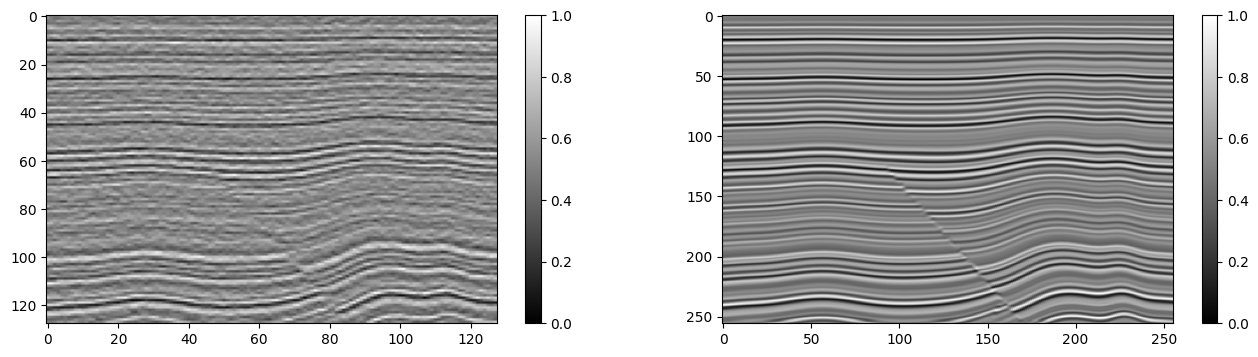

In [ ]:
import matplotlib.pyplot as plt
import numpy
import glob
import numpy as np
import torch
from collections import OrderedDict

# Loading the Training Data.
palab = glob.glob('/home/jbgpl/Downloads/SR_denoising/ESRT/dataset/DF2K_decoded/DIV2K_train_HR/*')
pain = glob.glob('/home/jbgpl/Downloads/SR_denoising/ESRT/dataset/DF2K_decoded/DIV2K_train_LR_bicubic/X2/*')#
print('len = ',len(palab))
datin = []
datlab = []
print(palab)
for k in range(len(palab)):

    sampleNO = palab[k].split('/')[-1]
    #print(sampleNO)
    pain = '/home/jbgpl/Downloads/SR_denoising/ESRT/dataset/DF2K_decoded/DIV2K_train_LR_bicubic/X2/' + str(sampleNO)
    datin.append(np.load(pain))
    datlab.append(np.load(palab[k]))

datin = np.array(datin)   # Input data.
datlab = np.array(datlab) # Label data.
print(datin.shape)

# Plotting Example for the Input and Label.
k = 10
fig = plt.figure(figsize=(16,4))
plt.subplot(1,2,1),plt.imshow(datin[k,0,:,:],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.subplot(1,2,2),plt.imshow(datlab[k,0,:,:],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.show() 

len =  100
/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/validation/image_SRF_2/2657.npy
(100, 1, 128, 128)


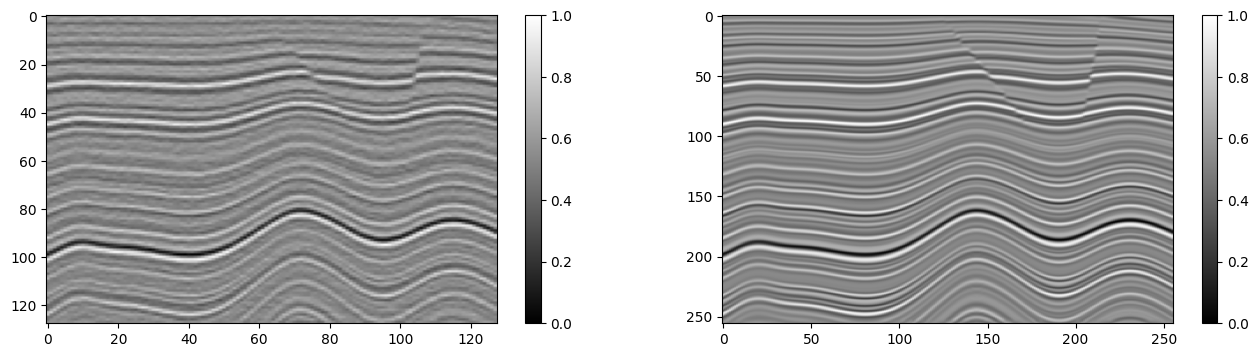

In [ ]:
# Loading the Validation Data.
palab = glob.glob('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/validation/image_SRF_2/*')

print('len = ',len(palab))
val_datin = []
val_datlab = []
print(palab[1])
for k in range(len(palab)):

    sampleNO = palab[k].split('/')[-1]
    #print(sampleNO)
    pain = '/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/validation_LR/x2/' + str(sampleNO)
    val_datin.append(np.load(pain))
    val_datlab.append(np.load(palab[k]))

val_datin = np.array(val_datin)   # Input data.
val_datlab = np.array(val_datlab) # Label data.
print(val_datin.shape)

# Plotting Example for the Input and Label.
k = 10
fig = plt.figure(figsize=(16,4))
plt.subplot(1,2,1),plt.imshow(val_datin[k,0,:,:],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.subplot(1,2,2),plt.imshow(val_datlab[k,0,:,:],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.show() 

In [ ]:
def FFT_Loss(seismic_image_data, seismic_image_data2):
    # seismic_image_data = seismic_image_data.detach().cpu().numpy()
    # seismic_image_data2 = seismic_image_data2.detach().cpu().numpy()
    # 최대값과 최소값 찾기
    max_value = np.max(seismic_image_data)
    min_value = np.min(seismic_image_data)
    # print(max_value, min_value)
    # # 정규화
    seismic_image_data = (seismic_image_data - min_value) / (max_value - min_value) * 2 - 1

    # Perform 2D Discrete Fourier Transform
    frequency_domain_data = np.fft.fft2(seismic_image_data)

    # Calculate the amplitude for each frequency
    amplitude = np.abs(frequency_domain_data)

    # Calculate the average amplitude along the frequency axis (axis=0)
    average_amplitude = np.mean(amplitude, axis=0)

    # Create x-axis with frequency values
    num_cols = seismic_image_data.shape[1]
    sampling_rate = 0.002  # You may adjust this depending on your actual data(dt)
    freq_values = np.fft.fftfreq(num_cols, d=sampling_rate)

    # Sample 2D seismic image data (replace this with your actual image data)

    # 최대값과 최소값 찾기
    max_value2 = np.max(seismic_image_data2)
    min_value2 = np.min(seismic_image_data2)
    # # 정규화
    seismic_image_data2 = (seismic_image_data2 - min_value2) / (max_value2 - min_value2) * 2 - 1


    # Perform 2D Discrete Fourier Transform
    frequency_domain_data2 = np.fft.fft2(seismic_image_data2)

    # Calculate the amplitude for each frequency
    amplitude2 = np.abs(frequency_domain_data2)

    # Calculate the average amplitude along the frequency axis (axis=0)
    average_amplitude2 = np.mean(amplitude2, axis=0)

    # Create x-axis with frequency values
    num_cols2 = seismic_image_data2.shape[1]
    sampling_rate2 = 0.002  # You may adjust this depending on your actual data(dt)
    freq_values2 = np.fft.fftfreq(num_cols2, d=sampling_rate2)
    input_half = seismic_image_data.shape[1]//2
    loss = np.abs((average_amplitude[:input_half]-average_amplitude2[:input_half])/average_amplitude2[:input_half])
    # loss = np.abs((average_amplitude[:input_half]-average_amplitude2[:input_half]))
    loss_avg = np.mean(loss)
    return loss_avg



In [ ]:
def FFT_Loss(seismic_image_data, seismic_image_data2):
    seismic_image_data = seismic_image_data.detach().cpu().numpy()
    seismic_image_data2 = seismic_image_data2.detach().cpu().numpy()
    # 최대값과 최소값 찾기
    max_value = np.max(seismic_image_data)
    min_value = np.min(seismic_image_data)
    # print(max_value, min_value)
    # # 정규화
    seismic_image_data = (seismic_image_data - min_value) / (max_value - min_value) * 2 - 1

    # Perform 2D Discrete Fourier Transform
    frequency_domain_data = np.fft.fft2(seismic_image_data)

    # Calculate the amplitude for each frequency
    amplitude = np.abs(frequency_domain_data)

    # Calculate the average amplitude along the frequency axis (axis=0)
    average_amplitude = np.mean(amplitude, axis=0)

    # Create x-axis with frequency values
    num_cols = seismic_image_data.shape[1]
    sampling_rate = 0.001  # You may adjust this depending on your actual data(dt)
    freq_values = np.fft.fftfreq(num_cols, d=sampling_rate)

    # Sample 2D seismic image data (replace this with your actual image data)

    # 최대값과 최소값 찾기
    max_value2 = np.max(seismic_image_data2)
    min_value2 = np.min(seismic_image_data2)
    # # 정규화
    seismic_image_data2 = (seismic_image_data2 - min_value2) / (max_value2 - min_value2) * 2 - 1


    # Perform 2D Discrete Fourier Transform
    frequency_domain_data2 = np.fft.fft2(seismic_image_data2)

    # Calculate the amplitude for each frequency
    amplitude2 = np.abs(frequency_domain_data2)

    # Calculate the average amplitude along the frequency axis (axis=0)
    average_amplitude2 = np.mean(amplitude2, axis=0)

    # Create x-axis with frequency values
    num_cols2 = seismic_image_data2.shape[1]
    sampling_rate2 = 0.001  # You may adjust this depending on your actual data(dt)
    freq_values2 = np.fft.fftfreq(num_cols2, d=sampling_rate2)
    loss = np.abs((average_amplitude[:128]-average_amplitude2[:128])/average_amplitude2[:128])
    loss_avg = np.mean(loss)
    return loss_avg

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def FFT(seismic_image_data, sampling_rate=0.002):
    # Sample 2D seismic image data (replace this with your actual image data)
    #seismic_image_data = np.fromfile('/home/parkj0e/KAUST/ESRT/Test_Datasets/Unet_synthetic/2886_256x256.dat',dtype='float32').reshape(256,-1)
    seismic_image_data = seismic_image_data.T
    # 최대값과 최소값 찾기
    max_value = np.max(seismic_image_data)
    min_value = np.min(seismic_image_data)
    # print(max_value, min_value)
    # # 정규화
    seismic_image_data = (seismic_image_data - min_value) / (max_value - min_value) * 2 - 1


    # Perform 2D Discrete Fourier Transform
    frequency_domain_data = np.fft.fft2(seismic_image_data)
    print('frequency_domain_data_shape : ', frequency_domain_data.shape)

    # Calculate the amplitude for each frequency
    amplitude = np.abs(frequency_domain_data)
    print('frequency_domain_amplitude_shape : ', amplitude.shape, amplitude)
    # Calculate the average amplitude along the frequency axis (axis=0)
    average_amplitude = np.mean(amplitude, axis=0)
    print('frequency_domain_average_amplitude_shape : ', average_amplitude.shape, average_amplitude)
    # Create x-axis with frequency values
    num_cols = seismic_image_data.shape[1]

    freq_values = np.fft.fftfreq(num_cols, d=sampling_rate)
    print('freq_values : ', freq_values.shape, freq_values)



    input_half = seismic_image_data.shape[1]//2
    return freq_values, average_amplitude, input_half



In [ ]:
from util import utils
from collections import OrderedDict
from scipy.ndimage import zoom

def yc_patch(A,l1,l2,o1,o2):
    #A = zoom(A, 2, order=5)
    n1,n2=np.shape(A);
    tmp=np.mod(n1-l1,o1)
    if tmp!=0:
        #print(np.shape(A), o1-tmp, n2)
        A=np.concatenate([A,np.zeros((o1-tmp,n2))],axis=0)

    tmp=np.mod(n2-l2,o2);
    if tmp!=0:
        A=np.concatenate([A,np.zeros((A.shape[0],o2-tmp))],axis=-1); 


    N1,N2 = np.shape(A)
    X=[]
    for i1 in range (0,N1-l1+1, o1):
        for i2 in range (0,N2-l2+1,o2):
            tmp=np.reshape(A[i1:i1+l1,i2:i2+l2],(l1*l2,1));
            X.append(tmp);  
    X = np.array(X)
    return X[:,:,0]

def Normalization(x):
    max_x = x.max()
    min_x = x.min()
    norm_out = (x-min_x)/(max_x-min_x)
    return norm_out

def DeNorm(x, norm_x):
    max_x = x.max()
    min_x = x.min()
    denorm = norm_x*(max_x-min_x)+min_x
    return denorm

def normalize_to_minus_one_one(data):
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = -1 + 2 * ((data - min_val) / (max_val - min_val))
    return normalized_data

def denormalize_minmax(normalized_array, min_value, max_value):
    denormalized_array = normalized_array * (max_value - min_value) + min_value
    return denormalized_array

def denormalize(original_array, normalized_array):
    """
    정규화된 배열을 다시 원래의 범위로 되돌리는 함수
    """
    min_val = original_array.min()
    max_val = original_array.max()
    mean_val = original_array.mean()
    std_val = original_array.std()
    
    denormalized_array = normalized_array * (max_val - min_val) + min_val
    denormalized_array = denormalized_array * std_val + mean_val
    return denormalized_array

def yc_patch_inv(X1,n1,n2,l1,l2,o1,o2):
    
    
    
    tmp1=np.mod(n1-l1,o1)
    tmp2=np.mod(n2-l2,o2)
    if (tmp1!=0) and (tmp2!=0):
        A     = np.zeros((n1+o1-tmp1,n2+o2-tmp2))
        mask  = np.zeros((n1+o1-tmp1,n2+o2-tmp2)) 

    if (tmp1!=0) and (tmp2==0): 
        A   = np.zeros((n1+o1-tmp1,n2))
        mask= np.zeros((n1+o1-tmp1,n2))


    if (tmp1==0) and (tmp2!=0):
        A    = np.zeros((n1,n2+o2-tmp2))   
        mask = np.zeros((n1,n2+o2-tmp2))   


    if (tmp1==0) and (tmp2==0):
        A    = np.zeros((n1,n2))
        mask = np.zeros((n1,n2))

    N1,N2= np.shape(A)
    ids=0
    for i1 in range(0,N1-l1+1,o1):
        for i2 in range(0,N2-l2+1,o2):
            #print(i1,i2)
    #       [i1,i2,ids]
            A[i1:i1+l1,i2:i2+l2]=A[i1:i1+l1,i2:i2+l2]+np.reshape(X1[:,ids],(l1,l2))
            mask[i1:i1+l1,i2:i2+l2]=mask[i1:i1+l1,i2:i2+l2]+ np.ones((l1,l2))
            ids=ids+1


    A=A/mask;  
    A=A[0:n1,0:n2]

    return A

# The ESRT Model

In [ ]:
import torch
import matplotlib
import matplotlib.pyplot as plt
import time
import h5py
import torch.optim as optim
import torch.nn as nn
import numpy as np
import math
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
from torchvision.utils import save_image
import torch.nn as nn
import torch.nn.functional as F
from util.tools import extract_image_patches,\
    reduce_mean, reduce_sum, same_padding, reverse_patches
from util.transformer import drop_path, DropPath, PatchEmbed, Mlp,MLABlock
from util.position import PositionEmbeddingLearned, PositionEmbeddingSine
import os
from model import common
from torchsummary import summary
from data import data_common

# Saving the Model During the Training.
def save_checkpoint(epoch):
    model_folder = "experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x{}/".format(2)
    model_out_path = model_folder + "epoch_{}.pth".format(epoch)
    if not os.path.exists(model_folder):
        os.makedirs(model_folder)
    torch.save(model.state_dict(), model_out_path)
    print("===> Checkpoint saved to {}".format(model_out_path))




# The Core Blocks of the ESRT.
class BasicConv(nn.Module):
    def __init__(self, in_planes, out_planes, kernel_size, stride=1, padding=1, dilation=1, groups=1, relu=True,
                 bn=False, bias=False, up_size=0,fan=False):
        super(BasicConv, self).__init__()
        wn = lambda x:torch.nn.utils.weight_norm(x)
        self.out_channels = out_planes
        self.in_channels = in_planes
        if fan:
            self.conv = nn.ConvTranspose2d(in_planes, out_planes, kernel_size=kernel_size, stride=stride, padding=padding,
                              dilation=dilation, groups=groups, bias=bias)
        else:
            self.conv = nn.Conv2d(in_planes, out_planes, kernel_size=kernel_size, stride=stride, padding=padding,
                              dilation=dilation, groups=groups, bias=bias)
        self.bn = nn.BatchNorm2d(out_planes, eps=1e-5, momentum=0.01, affine=True) if bn else None
        self.relu = nn.ReLU(inplace=True) if relu else None
        self.up_size = up_size
        self.up_sample = nn.Upsample(size=(up_size, up_size), mode='bilinear') if up_size != 0 else None
        
    def forward(self, x):
        x = self.conv(x)
        if self.bn is not None:
            x = self.bn(x)
        if self.relu is not None:
            x = self.relu(x)
        if self.up_size > 0:
            x = self.up_sample(x)
        return x



# The upsampler Block of the ESRT.
class Upsampler(nn.Sequential):
    def __init__(self, conv, scale, n_feats, bn=False, act=False, bias=True):

        m = []
        if (scale & (scale - 1)) == 0:    # Is scale = 2^n?
            for _ in range(int(math.log(scale, 2))):
                m.append(conv(n_feats, 4 * n_feats, 3, bias))
                m.append(nn.PixelShuffle(2))
                if bn: m.append(nn.BatchNorm2d(n_feats))

                if act == 'relu':
                    m.append(nn.ReLU(True))
                elif act == 'prelu':
                    m.append(nn.PReLU(n_feats))

        elif scale == 3:
            m.append(conv(n_feats, 9 * n_feats, 3, bias))
            m.append(nn.PixelShuffle(3))
            if bn: m.append(nn.BatchNorm2d(n_feats))

            if act == 'relu':
                m.append(nn.ReLU(True))
            elif act == 'prelu':
                m.append(nn.PReLU(n_feats))
        else:
            raise NotImplementedError

        super(Upsampler, self).__init__(*m)




# The Conv Block of the ESRT.
def default_conv(in_channels, out_channels, kernel_size, bias=True, groups = 1):
    wn = lambda x:torch.nn.utils.weight_norm(x)
    return nn.Conv2d(
        in_channels, out_channels, kernel_size,
        padding=(kernel_size//2), bias=bias, groups = groups)





## Channel Attention (CA) Layer
class CALayer(nn.Module):
    def __init__(self, channel, reduction=4):
        super(CALayer, self).__init__()
        # global average pooling: feature --> point
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        # feature channel downscale and upscale --> channel weight
        self.conv_du = nn.Sequential(
                nn.Conv2d(channel, channel // reduction, 1, padding=0, bias=True),
                nn.ReLU(inplace=True),
                nn.Conv2d(channel // reduction, channel, 1, padding=0, bias=True),
                nn.Sigmoid()
        )

    def forward(self, x):
        y = self.avg_pool(x)
        y = self.conv_du(y)
        return x * y

class one_conv(nn.Module):        # Residual Unit (RU)
    def __init__(self,inchanels,growth_rate,kernel_size = 3, relu = True):
        super(one_conv,self).__init__()
        wn = lambda x:torch.nn.utils.weight_norm(x)
        self.conv = nn.Conv2d(inchanels,growth_rate,kernel_size=kernel_size,padding = kernel_size>>1,stride= 1)
        self.flag = relu
        self.conv1 = nn.Conv2d(growth_rate,inchanels,kernel_size=kernel_size,padding = kernel_size>>1,stride= 1)
        if relu:
            self.relu = nn.PReLU(growth_rate)
        self.weight1 = common.Scale(1)
        self.weight2 = common.Scale(1)
    def forward(self,x):
        if self.flag == False:
            output = self.weight1(x) + self.weight2(self.conv1(self.conv(x)))
        else:
            output = self.weight1(x) + self.weight2(self.conv1(self.relu(self.conv(x))))
        return output#torch.cat((x,output),1)
        

class one_module(nn.Module):     # Adaptive Residual Feature Block (ARFB)
    def __init__(self, n_feats):
        super(one_module, self).__init__()
        self.layer1 = one_conv(n_feats, n_feats//2,3)
        self.layer2 = one_conv(n_feats, n_feats//2,3)
        # self.layer3 = one_conv(n_feats, n_feats//2,3)
        self.layer4 = BasicConv(n_feats, n_feats, 3,1,1)
        self.alise = BasicConv(2*n_feats, n_feats, 1,1,0)
        self.atten = CALayer(n_feats)
        self.weight1 = common.Scale(1)
        self.weight2 = common.Scale(1)
        self.weight3 = common.Scale(1)
        self.weight4 = common.Scale(1)
        self.weight5 = common.Scale(1)
    def forward(self, x):

        x1 = self.layer1(x)
        x2 = self.layer2(x1)
        # x3 = self.layer3(x2)
        # pdb.set_trace()
        x4 = self.layer4(self.atten(self.alise(torch.cat([self.weight2(x2),self.weight3(x1)],1))))
        return self.weight4(x)+self.weight5(x4)
    
class Updownblock(nn.Module):    # High Preserving Block (HPB)
    def __init__(self, n_feats):
        super(Updownblock, self).__init__()
        self.encoder = one_module(n_feats)
        self.decoder_low = one_module(n_feats) #nn.Sequential(one_module(n_feats),
        #                     one_module(n_feats),
        #                     one_module(n_feats))
        self.decoder_high = one_module(n_feats)
        self.alise = one_module(n_feats)
        self.alise2 = BasicConv(2*n_feats, n_feats, 1,1,0) #one_module(n_feats)
        self.down = nn.AvgPool2d(kernel_size=2)
        self.att = CALayer(n_feats)

    def forward(self, x):
        x1 = self.encoder(x)
        x2 = self.down(x1)
        high = x1 - F.interpolate(x2, size = x.size()[-2:], mode='bilinear', align_corners=True)
        for i in range(5):
            x2 = self.decoder_low(x2)
        x3 = x2
        # x3 = self.decoder_low(x2)
        high1 = self.decoder_high(high)
        x4 = F.interpolate(x3, size = x.size()[-2:], mode='bilinear', align_corners=True)
        return self.alise(self.att(self.alise2(torch.cat([x4,high1],dim=1))))+ x

###########Gabor#########

from torch.nn.modules.conv import _ConvNd
from torch.nn.modules.utils import _pair
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
class GaborConv2d(_ConvNd):

    def __init__(self, in_channels, out_channels, kernel_size, device="cpu", stride=1,
                 padding=1, dilation=1, groups=1, bias=False, padding_mode='replicate'):
        kernel_size = _pair(kernel_size)
        stride = _pair(stride)
        padding = _pair(padding)
        dilation = _pair(dilation)

        super(GaborConv2d, self).__init__(in_channels, out_channels, kernel_size, stride, padding, dilation, False,
                                          _pair(0), groups, bias, padding_mode)
        self.freq = nn.Parameter(
            (3.14 / 2) * 1.41 ** (-torch.randint(0, 5, (out_channels, in_channels))).type(torch.Tensor))
        self.theta = nn.Parameter((3.14 / 8) * torch.randint(0, 8, (out_channels, in_channels)).type(torch.Tensor))
        self.psi = nn.Parameter(3.14 * torch.rand(out_channels, in_channels))
        self.sigma = nn.Parameter(3.14 / self.freq)
        self.x0 = torch.ceil(torch.Tensor([self.kernel_size[0] / 2]))[0]
        self.y0 = torch.ceil(torch.Tensor([self.kernel_size[1] / 2]))[0]
        self.device = device

    def forward(self, input_image):
        y, x = torch.meshgrid([torch.linspace(-self.x0 + 1, self.x0, self.kernel_size[0]),
                               torch.linspace(-self.y0 + 1, self.y0, self.kernel_size[1])])
        x = x.to(self.device)
        y = y.to(self.device)
        weight = torch.empty(self.weight.shape, requires_grad=False).to(self.device)
        for i in range(self.out_channels):
            for j in range(self.in_channels):
                sigma = self.sigma[i, j].expand_as(y)
                freq = self.freq[i, j].expand_as(y)
                theta = self.theta[i, j].expand_as(y)
                psi = self.psi[i, j].expand_as(y)

                rotx = x * torch.cos(theta) + y * torch.sin(theta)
                roty = -x * torch.sin(theta) + y * torch.cos(theta)

                g = torch.zeros(y.shape)

                g = torch.exp(-0.5 * ((rotx ** 2 + roty ** 2) / (sigma + 1e-3) ** 2))
                g = g * torch.cos(freq * rotx + psi)
                g = g / (2 * 3.14 * sigma ** 2)
                weight[i, j] = g
                self.weight.data[i, j] = g
        return F.conv2d(input_image, weight, self.bias, self.stride, self.padding, self.dilation, self.groups)
# Calling the ESRT.
scale = 2
n_feats = 8
n_channels = 1
kernel_size= 3
n_blocks = 1
dec_num = 4
class SRCNN(nn.Module):
    def __init__(self,conv=default_conv):
        super(SRCNN, self).__init__()
        self.upin = nn.Sequential(Upsampler(conv,scale,8*n_feats,act=False),
                          BasicConv(8*n_feats, 8*n_feats,3,1,1))
        self.encoder1 = Updownblock(2*n_feats)
        self.encoder2 = Updownblock(4*n_feats)
        self.encoder3 = Updownblock(8*n_feats)

        self.GaborConv1 = GaborConv2d(in_channels=n_feats, out_channels=2*n_feats, kernel_size=(3, 3), device=device)
        self.GaborConv2 = GaborConv2d(in_channels=2*n_feats, out_channels=4*n_feats, kernel_size=(3, 3), device=device)
        self.GaborConv3 = GaborConv2d(in_channels=4*n_feats, out_channels=8*n_feats, kernel_size=(3, 3), device=device)
        self.conv1 = nn.Conv2d(n_feats, 2*n_feats, kernel_size=3, padding=1, padding_mode='replicate') # padding mode same as original Caffe code
        self.conv12 = nn.Conv2d(2*n_feats, 4*n_feats, kernel_size=3, padding=1, padding_mode='replicate') # padding mode same as original Caffe code
        self.conv13 = nn.Conv2d(4*n_feats, 8*n_feats, kernel_size=3, padding=1, padding_mode='replicate') # padding mode same as original Caffe code

        self.conv23 = nn.Conv2d(8*n_feats, 4*n_feats, kernel_size=3, padding=1, padding_mode='replicate')
        self.conv22 = nn.Conv2d(4*n_feats, 2*n_feats, kernel_size=3, padding=1, padding_mode='replicate')
        self.conv2 = nn.Conv2d(2*n_feats, n_feats, kernel_size=3, padding=1, padding_mode='replicate')
        
        
        self.conv3 = nn.Conv2d(4*n_feats, 1, kernel_size=3, padding=1, padding_mode='replicate')
        
        self.up = nn.Sequential(Upsampler(conv,scale,n_feats,act=False),
                          BasicConv(n_feats, n_channels,3,1,1))
        
        modules_head = [conv(n_channels, n_feats, kernel_size)]
        self.head = nn.Sequential(*modules_head)
        
        self.atten1 = CALayer(2*n_feats)
        self.atten2 = CALayer(4*n_feats)
        self.atten3 = CALayer(8*n_feats)

        self.atten11 = CALayer(4*n_feats)
        self.atten22 = CALayer(2*n_feats)
        self.atten33 = CALayer(1*n_feats)
        
        self.down = nn.AvgPool2d(kernel_size=2)

        self.d1 = nn.Sequential(Upsampler(conv,scale,4*n_feats,act=False),
                          BasicConv(4*n_feats, 4*n_feats,3,1,1))
        
        self.d2 = nn.Sequential(Upsampler(conv,scale,2*n_feats,act=False),
                          BasicConv(2*n_feats, 2*n_feats,3,1,1))
        
        self.d3 = nn.Sequential(Upsampler(conv,scale,n_feats,act=False),
                          BasicConv(n_feats, n_feats,3,1,1))
        
        self.attention = MLABlock(n_feat=8*n_feats, dim=576) 
        self.alise = default_conv(8*n_feats, 8*n_feats, 3)
        
    def forward(self, x):
        xx = self.head(x)
        res2 = xx
        
        
        #x1 = F.relu(self.upin(xx))
        
        #Encoder
        x2 = F.relu(self.conv1(xx))
        #x2 = self.atten1(x2)
        x2 = self.encoder1(x2)

        x2 = F.relu(self.conv12(x2))
        #x2 = self.atten2(x2)
        x2 = self.encoder2(x2)

        x2 = F.relu(self.conv13(x2))
        x2 = self.encoder3(x2)
        #x2 = self.atten3(x2)
        x2 = self.down(x2)
        
        
        # Transformer
        b,c,h,w = x2.shape
        x2 = self.attention(x2)
        x2 = x2.permute(0,2,1)
        x2 = reverse_patches(x2, (h,w), (3,3), 1, 1)
        x2 = self.alise(x2)
        x2 = F.relu(self.upin(x2))
        
        #Decoder
        x3 = F.relu(self.conv23(x2))
        x3 = self.atten11(x3)
        x3 = self.d1(x3)
    

        #Final Layer
        x4 = self.conv3(x3)
          
        #Up-Scale
        x11 =  self.up(res2)
        x4 = x4 + x11
        return x4
    


# learning parameters
batch_size = 16 # batch size, reduce if facing Out Of Memory error
epochs = 301 # number of epochs to train the SRCNN model for
lr = 0.001 # the learning rate
gamma = 0.5
step_size = 100
device = 'cuda' if torch.cuda.is_available() else 'cpu'
    
class SRCNNDataset(Dataset):
    def __init__(self, image_data, labels, train=True):
        self.train = train
        self.image_data = image_data
        self.labels = labels

        n_patches = 3200  # Batch size: 16, Test frequency: 1000
        self.repeat = max(n_patches // len(self.labels), 1) if len(self.labels) > 0 else 0

    def __len__(self):
        return len(self.labels) * self.repeat

    def __getitem__(self, index):
        image, label = self._load_file(index)
        image, label = self._get_patch(image, label)
        lr_tensor, hr_tensor = data_common.np2Tensor(image, label)
        return lr_tensor, hr_tensor

    def _load_file(self, index):
        index = index % len(self.labels)
        img_hr = self.labels[index]
        img_lr = self.image_data[index]
        return img_lr, img_hr

    def _get_patch(self, img_in, img_tar):
        # Apply patch extraction and augmentation
        # Modify this part as needed
        patch_size = 96
        scale = 2
        img_in, img_tar = img_in.transpose(1,2,0),img_tar.transpose(1,2,0)
        img_in, img_tar = data_common.get_patch(img_in, img_tar, patch_size=patch_size, scale=scale)
        
        img_in, img_tar = data_common.augment(img_in, img_tar)
        # print('after augment',img_in.shape, img_tar.shape)
        # plt.figure(figsize=(4,4))
        # plt.imshow(img_in[:,:,0],aspect='auto',cmap='gray')
        # plt.show()
        return img_in, img_tar
    

class SRCNN_TestDataset(Dataset):
    def __init__(self, image_data, labels):
        self.image_data = image_data
        self.labels = labels
    def __len__(self):
        return (len(self.image_data))
    def __getitem__(self, index):
        image = self.image_data[index]
        label = self.labels[index]
        return(
            torch.tensor(image, dtype=torch.float),
            torch.tensor(label, dtype=torch.float))


# train and validation data
train_data = SRCNNDataset(datin, datlab)
validation_data = SRCNN_TestDataset(val_datin, val_datlab)

# train and validation loaders
train_loader = DataLoader(train_data, batch_size=batch_size)
validation_loader = DataLoader(validation_data, batch_size=batch_size)

# initialize the model
print('Computation device: ', device)
model = SRCNN().to(device)

# optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)

# loss function 
criterion = nn.MSELoss()

def adjust_learning_rate(optimizer, epoch, step_size, lr_init, gamma):
    factor = epoch // step_size
    lr = lr_init * (gamma ** factor)
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

# PSNR Function.
def psnr(label, outputs, max_val=1.):
    """
    Compute Peak Signal to Noise Ratio (the higher the better).
    PSNR = 20 * log10(MAXp) - 10 * log10(MSE).
    https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio#Definition
    First we need to convert torch tensors to NumPy operable.
    """
    label = label.cpu().detach().numpy()
    outputs = outputs.cpu().detach().numpy()
    img_diff = outputs - label
    rmse = math.sqrt(np.mean((img_diff) ** 2))
    if rmse == 0:
        return 100
    else:
        PSNR = 20 * math.log10(max_val / rmse)
        return PSNR

summary(model,(1,128,128))

### MSSSIM Loss ###
import torch
import torch.nn.functional as F
from math import exp

def gaussian(window_size, sigma):
    gauss = torch.Tensor([exp(-(x - window_size//2)**2/float(2*sigma**2)) for x in range(window_size)])
    return gauss/gauss.sum()

def create_window(window_size, channel=1):
    _1D_window = gaussian(window_size, 1.5).unsqueeze(1)
    _2D_window = _1D_window.mm(_1D_window.t()).float().unsqueeze(0).unsqueeze(0)
    window = _2D_window.expand(channel, 1, window_size, window_size).contiguous()
    return window


def ssim(img1, img2, window_size=11, window=None, size_average=True, full=False, val_range=None):
    # Value range can be different from 255. Other common ranges are 1 (sigmoid) and 2 (tanh).
    if val_range is None:
        if torch.max(img1) > 128:
            max_val = 255
        else:
            max_val = 1

        if torch.min(img1) < -0.5:
            min_val = -1
        else:
            min_val = 0
        L = max_val - min_val
    else:
        L = val_range

    padd = 0
    (_, channel, height, width) = img1.size()
    if window is None:
        real_size = min(window_size, height, width)
        window = create_window(real_size, channel=channel).to(img1.device)

    mu1 = F.conv2d(img1, window, padding=padd, groups=channel)
    mu2 = F.conv2d(img2, window, padding=padd, groups=channel)

    mu1_sq = mu1.pow(2)
    mu2_sq = mu2.pow(2)
    mu1_mu2 = mu1 * mu2

    sigma1_sq = F.conv2d(img1 * img1, window, padding=padd, groups=channel) - mu1_sq
    sigma2_sq = F.conv2d(img2 * img2, window, padding=padd, groups=channel) - mu2_sq
    sigma12 = F.conv2d(img1 * img2, window, padding=padd, groups=channel) - mu1_mu2

    C1 = (0.01 * L) ** 2
    C2 = (0.03 * L) ** 2

    v1 = 2.0 * sigma12 + C2
    v2 = sigma1_sq + sigma2_sq + C2
    cs = torch.mean(v1 / v2)  # contrast sensitivity

    ssim_map = ((2 * mu1_mu2 + C1) * v1) / ((mu1_sq + mu2_sq + C1) * v2)

    if size_average:
        ret = ssim_map.mean()
    else:
        ret = ssim_map.mean(1).mean(1).mean(1)

    if full:
        return ret, cs
    return ret

def msssim(img1, img2, window_size=11, size_average=True, val_range=None, normalize=True):
    device = img1.device
    weights = torch.FloatTensor([0.0448, 0.2856, 0.3001, 0.2363, 0.1333]).to(device)
    levels = weights.size()[0]
    mssim = []
    mcs = []
    for _ in range(levels):
        sim, cs = ssim(img1, img2, window_size=window_size, size_average=size_average, full=True, val_range=val_range)
        mssim.append(sim)
        mcs.append(cs)

        img1 = F.avg_pool2d(img1, (2, 2))
        img2 = F.avg_pool2d(img2, (2, 2))

    mssim = torch.stack(mssim)
    mcs = torch.stack(mcs)

    # Normalize (to avoid NaNs during training unstable models, not compliant with original definition)
    if normalize:
        mssim = (mssim + 1) / 2
        mcs = (mcs + 1) / 2

    pow1 = mcs ** weights
    pow1 = pow1.detach().cpu().numpy()
    pow2 = mssim ** weights
    pow2 = pow2.detach().cpu().numpy()
    # From Matlab implementation https://ece.uwaterloo.ca/~z70wang/research/iwssim/
    output = np.prod(pow1[:-1] * pow2[-1])  
    return output

class MSSSIM(torch.nn.Module):
    def __init__(self, window_size=11, size_average=True, channel=1):
        super(MSSSIM, self).__init__()
        self.window_size = window_size
        self.size_average = size_average
        self.channel = channel

    def forward(self, img1, img2):
        # TODO: store window between calls if possible
        return 1 - msssim(img1, img2, window_size=self.window_size, size_average=self.size_average)

# Training Function.
import pytorch_ssim
from pytorch_msssim import ssim, ms_ssim, SSIM, MS_SSIM
def train(model, dataloader):
    model.train()
    adjust_learning_rate(optimizer, epoch, step_size, lr, gamma)
    running_loss = 0.0
    running_psnr = 0.0
    for bi, data in tqdm(enumerate(dataloader), total=int(len(train_data)/dataloader.batch_size)):
        image_data = data[0].to(device)
        label = data[1].to(device)
        # zero grad the optimizer
        optimizer.zero_grad()
        outputs = model(image_data)
        loss_per1 = 0.3
        loss_per2 = 0.6
        loss_per3 = 0.1
        loss1 = criterion(outputs, label) 
        loss2 = 1 - ssim(outputs, label, data_range=1, size_average = True)
        # loss2 = 1 - msssim(outputs, label, window_size=11, size_average=True)
        loss3 = FFT_Loss(outputs, label)
        # print('mse loss, ssim loss, fft loss : ', loss1, loss2, loss3)
        # Customize loss function.
        loss = loss_per1*loss1+loss_per2*loss2+loss_per3*loss3
        # backpropagation
        loss.backward()
        # update the parameters
        optimizer.step()
        # add loss of each item (total items in a batch = batch size)
        running_loss += loss.item()
        # calculate batch psnr (once every `batch_size` iterations)
        batch_psnr =  psnr(label, outputs)
        running_psnr += batch_psnr
    final_loss = running_loss/len(dataloader.dataset)
    final_psnr = running_psnr/int(len(train_data)/dataloader.batch_size)
    return final_loss, final_psnr

def validation(model, dataloader):
    model.eval()
    adjust_learning_rate(optimizer, epoch, step_size, lr, gamma)
    running_loss = 0.0
    running_psnr = 0.0
    for bi, data in tqdm(enumerate(dataloader), total=int(len(validation_data)/dataloader.batch_size)):
        image_data = data[0].to(device)
        label = data[1].to(device)
        # zero grad the optimizer
        optimizer.zero_grad()
        outputs = model(image_data)
        loss_per1 = 0.3
        loss_per2 = 0.6
        loss_per3 = 0.1
        loss1 = criterion(outputs, label) 
        loss2 = 1 - ssim(outputs, label, data_range=1, size_average = True)
        # loss2 = 1 - msssim(outputs, label, window_size=11, size_average=True)
        loss3 = FFT_Loss(outputs, label)
        # Customize loss function.
        loss = loss_per1*loss1+loss_per2*loss2+loss_per3*loss3
        # backpropagation
        loss.backward()
        # update the parameters
        optimizer.step()
        # add loss of each item (total items in a batch = batch size)
        running_loss += loss.item()
        # calculate batch psnr (once every `batch_size` iterations)
        batch_psnr =  psnr(label, outputs)
        running_psnr += batch_psnr
    final_val_loss = running_loss/len(dataloader.dataset)
    final_val_psnr = running_psnr/int(len(validation_data)/dataloader.batch_size)
    return final_val_loss, final_val_psnr

Computation device:  cuda
scale 0.11785113019775792
576
72
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 8, 128, 128]              80
            Conv2d-2         [-1, 16, 128, 128]           1,168
             Scale-3         [-1, 16, 128, 128]               0
            Conv2d-4          [-1, 8, 128, 128]           1,160
             PReLU-5          [-1, 8, 128, 128]               8
            Conv2d-6         [-1, 16, 128, 128]           1,168
             Scale-7         [-1, 16, 128, 128]               0
          one_conv-8         [-1, 16, 128, 128]               0
             Scale-9         [-1, 16, 128, 128]               0
           Conv2d-10          [-1, 8, 128, 128]           1,160
            PReLU-11          [-1, 8, 128, 128]               8
           Conv2d-12         [-1, 16, 128, 128]           1,168
            Scale-13         [-1, 16, 128, 1

In [ ]:
torch.manual_seed(1)
torch.cuda.manual_seed_all(1)
np.random.seed(1)

# The Training Process

In [10]:
import pickle
if train:
    
    
    
    train_loss = []
    train_psnr = []
    validation_loss = []
    validation_psnr = []    
    start = time.time()
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1} of {epochs}")
        train_epoch_loss, train_epoch_psnr = train(model, train_loader)

        print(f"Train PSNR: {train_epoch_psnr:.3f}")
        train_loss.append(train_epoch_loss)
        train_psnr.append(train_epoch_psnr)
        save_checkpoint(epoch)
        #if epoch%10==0:
            
        # val_epoch_loss, val_epoch_psnr = validation(model, validation_loader)
        # print(f"Validation PSNR: {val_epoch_psnr:.3f}")
        # validation_loss.append(val_epoch_loss)
        # validation_psnr.append(val_epoch_psnr)
        # print('train_epoch_loss : ', train_epoch_loss)
        # print('validation_epoch_loss : ', val_epoch_loss)
        #     if val_epoch_loss < validation_loss[-1] and val_epoch_psnr > validation_psnr[-1]: 
        #         save_checkpoint(epoch)
        #         print('save validation loss')
            
            
    end = time.time()
    print(f"Finished training in: {((end-start)/60):.3f} minutes")
    with open('ESRT_train_loss.pkl', 'wb') as f:
        pickle.dump(train_loss, f)
    with open('ESRT_train_psnr.pkl', 'wb') as p:
        pickle.dump(train_psnr, p)

    # with open('ESRT_validation_loss.pkl', 'wb') as l:
    #     pickle.dump(validation_loss, l) 
    # with open('ESRT_validation_psnr.pkl', 'wb') as q:
    #     pickle.dump(validation_psnr, q)

Epoch 1 of 301


  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:47<00:00,  4.19it/s]


Train PSNR: 18.914
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_0.pth
Epoch 2 of 301


100%|██████████| 200/200 [00:45<00:00,  4.43it/s]


Train PSNR: 21.843
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_1.pth
Epoch 3 of 301


100%|██████████| 200/200 [00:43<00:00,  4.58it/s]


Train PSNR: 22.529
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_2.pth
Epoch 4 of 301


100%|██████████| 200/200 [00:44<00:00,  4.50it/s]


Train PSNR: 22.918
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_3.pth
Epoch 5 of 301


100%|██████████| 200/200 [00:48<00:00,  4.15it/s]


Train PSNR: 23.103
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_4.pth
Epoch 6 of 301


100%|██████████| 200/200 [00:48<00:00,  4.16it/s]


Train PSNR: 23.299
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_5.pth
Epoch 7 of 301


100%|██████████| 200/200 [00:47<00:00,  4.25it/s]


Train PSNR: 23.498
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_6.pth
Epoch 8 of 301


100%|██████████| 200/200 [00:43<00:00,  4.61it/s]


Train PSNR: 23.600
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_7.pth
Epoch 9 of 301


100%|██████████| 200/200 [00:43<00:00,  4.59it/s]


Train PSNR: 23.623
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_8.pth
Epoch 10 of 301


100%|██████████| 200/200 [00:45<00:00,  4.42it/s]


Train PSNR: 23.784
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_9.pth
Epoch 11 of 301


100%|██████████| 200/200 [00:45<00:00,  4.39it/s]


Train PSNR: 23.897
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_10.pth
Epoch 12 of 301


100%|██████████| 200/200 [00:46<00:00,  4.33it/s]


Train PSNR: 23.976
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_11.pth
Epoch 13 of 301


100%|██████████| 200/200 [00:45<00:00,  4.43it/s]


Train PSNR: 24.094
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_12.pth
Epoch 14 of 301


100%|██████████| 200/200 [00:43<00:00,  4.56it/s]


Train PSNR: 24.104
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_13.pth
Epoch 15 of 301


100%|██████████| 200/200 [00:47<00:00,  4.23it/s]


Train PSNR: 24.195
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_14.pth
Epoch 16 of 301


100%|██████████| 200/200 [00:46<00:00,  4.27it/s]


Train PSNR: 24.258
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_15.pth
Epoch 17 of 301


100%|██████████| 200/200 [00:47<00:00,  4.22it/s]


Train PSNR: 24.348
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_16.pth
Epoch 18 of 301


100%|██████████| 200/200 [00:44<00:00,  4.52it/s]


Train PSNR: 24.380
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_17.pth
Epoch 19 of 301


100%|██████████| 200/200 [00:45<00:00,  4.40it/s]


Train PSNR: 24.440
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_18.pth
Epoch 20 of 301


100%|██████████| 200/200 [00:48<00:00,  4.17it/s]


Train PSNR: 24.493
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_19.pth
Epoch 21 of 301


100%|██████████| 200/200 [00:47<00:00,  4.24it/s]


Train PSNR: 24.504
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_20.pth
Epoch 22 of 301


100%|██████████| 200/200 [00:46<00:00,  4.30it/s]


Train PSNR: 24.526
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_21.pth
Epoch 23 of 301


100%|██████████| 200/200 [00:44<00:00,  4.48it/s]


Train PSNR: 24.571
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_22.pth
Epoch 24 of 301


100%|██████████| 200/200 [00:43<00:00,  4.63it/s]


Train PSNR: 24.629
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_23.pth
Epoch 25 of 301


100%|██████████| 200/200 [00:46<00:00,  4.31it/s]


Train PSNR: 24.677
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_24.pth
Epoch 26 of 301


100%|██████████| 200/200 [00:44<00:00,  4.52it/s]


Train PSNR: 24.734
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_25.pth
Epoch 27 of 301


100%|██████████| 200/200 [00:42<00:00,  4.70it/s]


Train PSNR: 24.764
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_26.pth
Epoch 28 of 301


100%|██████████| 200/200 [00:44<00:00,  4.44it/s]


Train PSNR: 24.764
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_27.pth
Epoch 29 of 301


100%|██████████| 200/200 [00:44<00:00,  4.52it/s]


Train PSNR: 24.766
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_28.pth
Epoch 30 of 301


100%|██████████| 200/200 [00:45<00:00,  4.36it/s]


Train PSNR: 24.871
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_29.pth
Epoch 31 of 301


100%|██████████| 200/200 [00:46<00:00,  4.33it/s]


Train PSNR: 24.919
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_30.pth
Epoch 32 of 301


100%|██████████| 200/200 [00:47<00:00,  4.24it/s]


Train PSNR: 24.958
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_31.pth
Epoch 33 of 301


100%|██████████| 200/200 [00:41<00:00,  4.78it/s]


Train PSNR: 24.984
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_32.pth
Epoch 34 of 301


100%|██████████| 200/200 [00:48<00:00,  4.17it/s]


Train PSNR: 25.067
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_33.pth
Epoch 35 of 301


100%|██████████| 200/200 [00:45<00:00,  4.42it/s]


Train PSNR: 25.106
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_34.pth
Epoch 36 of 301


100%|██████████| 200/200 [00:44<00:00,  4.52it/s]


Train PSNR: 25.163
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_35.pth
Epoch 37 of 301


100%|██████████| 200/200 [00:46<00:00,  4.31it/s]


Train PSNR: 25.104
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_36.pth
Epoch 38 of 301


100%|██████████| 200/200 [00:44<00:00,  4.54it/s]


Train PSNR: 25.155
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_37.pth
Epoch 39 of 301


100%|██████████| 200/200 [00:42<00:00,  4.73it/s]


Train PSNR: 25.207
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_38.pth
Epoch 40 of 301


100%|██████████| 200/200 [00:49<00:00,  4.06it/s]


Train PSNR: 25.205
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_39.pth
Epoch 41 of 301


100%|██████████| 200/200 [00:45<00:00,  4.36it/s]


Train PSNR: 25.216
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_40.pth
Epoch 42 of 301


100%|██████████| 200/200 [00:43<00:00,  4.62it/s]


Train PSNR: 25.265
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_41.pth
Epoch 43 of 301


100%|██████████| 200/200 [00:47<00:00,  4.20it/s]


Train PSNR: 25.281
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_42.pth
Epoch 44 of 301


100%|██████████| 200/200 [00:47<00:00,  4.18it/s]


Train PSNR: 25.314
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_43.pth
Epoch 45 of 301


100%|██████████| 200/200 [00:44<00:00,  4.48it/s]


Train PSNR: 25.331
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_44.pth
Epoch 46 of 301


100%|██████████| 200/200 [00:43<00:00,  4.62it/s]


Train PSNR: 25.282
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_45.pth
Epoch 47 of 301


100%|██████████| 200/200 [00:45<00:00,  4.39it/s]


Train PSNR: 25.324
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_46.pth
Epoch 48 of 301


100%|██████████| 200/200 [00:44<00:00,  4.46it/s]


Train PSNR: 25.337
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_47.pth
Epoch 49 of 301


100%|██████████| 200/200 [00:48<00:00,  4.12it/s]


Train PSNR: 25.381
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_48.pth
Epoch 50 of 301


100%|██████████| 200/200 [00:45<00:00,  4.42it/s]


Train PSNR: 25.424
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_49.pth
Epoch 51 of 301


100%|██████████| 200/200 [00:45<00:00,  4.44it/s]


Train PSNR: 25.430
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_50.pth
Epoch 52 of 301


100%|██████████| 200/200 [00:45<00:00,  4.40it/s]


Train PSNR: 25.449
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_51.pth
Epoch 53 of 301


100%|██████████| 200/200 [00:45<00:00,  4.39it/s]


Train PSNR: 25.429
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_52.pth
Epoch 54 of 301


100%|██████████| 200/200 [00:47<00:00,  4.17it/s]


Train PSNR: 25.419
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_53.pth
Epoch 55 of 301


100%|██████████| 200/200 [00:45<00:00,  4.39it/s]


Train PSNR: 25.483
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_54.pth
Epoch 56 of 301


100%|██████████| 200/200 [00:43<00:00,  4.61it/s]


Train PSNR: 25.488
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_55.pth
Epoch 57 of 301


100%|██████████| 200/200 [00:46<00:00,  4.34it/s]


Train PSNR: 25.509
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_56.pth
Epoch 58 of 301


100%|██████████| 200/200 [00:46<00:00,  4.27it/s]


Train PSNR: 25.523
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_57.pth
Epoch 59 of 301


100%|██████████| 200/200 [00:42<00:00,  4.68it/s]


Train PSNR: 25.499
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_58.pth
Epoch 60 of 301


100%|██████████| 200/200 [00:44<00:00,  4.47it/s]


Train PSNR: 25.532
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_59.pth
Epoch 61 of 301


100%|██████████| 200/200 [00:47<00:00,  4.21it/s]


Train PSNR: 25.567
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_60.pth
Epoch 62 of 301


100%|██████████| 200/200 [00:47<00:00,  4.22it/s]


Train PSNR: 25.557
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_61.pth
Epoch 63 of 301


100%|██████████| 200/200 [00:49<00:00,  4.02it/s]


Train PSNR: 25.622
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_62.pth
Epoch 64 of 301


100%|██████████| 200/200 [00:44<00:00,  4.48it/s]


Train PSNR: 25.594
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_63.pth
Epoch 65 of 301


100%|██████████| 200/200 [00:44<00:00,  4.45it/s]


Train PSNR: 25.621
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_64.pth
Epoch 66 of 301


100%|██████████| 200/200 [00:46<00:00,  4.32it/s]


Train PSNR: 25.619
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_65.pth
Epoch 67 of 301


100%|██████████| 200/200 [00:46<00:00,  4.30it/s]


Train PSNR: 25.597
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_66.pth
Epoch 68 of 301


100%|██████████| 200/200 [00:46<00:00,  4.30it/s]


Train PSNR: 25.633
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_67.pth
Epoch 69 of 301


100%|██████████| 200/200 [00:46<00:00,  4.26it/s]


Train PSNR: 25.690
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_68.pth
Epoch 70 of 301


100%|██████████| 200/200 [00:48<00:00,  4.15it/s]


Train PSNR: 25.681
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_69.pth
Epoch 71 of 301


100%|██████████| 200/200 [00:44<00:00,  4.48it/s]


Train PSNR: 25.695
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_70.pth
Epoch 72 of 301


100%|██████████| 200/200 [00:46<00:00,  4.33it/s]


Train PSNR: 25.687
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_71.pth
Epoch 73 of 301


100%|██████████| 200/200 [00:46<00:00,  4.33it/s]


Train PSNR: 25.662
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_72.pth
Epoch 74 of 301


100%|██████████| 200/200 [00:46<00:00,  4.29it/s]


Train PSNR: 25.764
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_73.pth
Epoch 75 of 301


100%|██████████| 200/200 [00:45<00:00,  4.43it/s]


Train PSNR: 25.773
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_74.pth
Epoch 76 of 301


100%|██████████| 200/200 [00:43<00:00,  4.63it/s]


Train PSNR: 25.734
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_75.pth
Epoch 77 of 301


100%|██████████| 200/200 [00:47<00:00,  4.23it/s]


Train PSNR: 25.778
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_76.pth
Epoch 78 of 301


100%|██████████| 200/200 [00:44<00:00,  4.49it/s]


Train PSNR: 25.773
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_77.pth
Epoch 79 of 301


100%|██████████| 200/200 [00:47<00:00,  4.19it/s]


Train PSNR: 25.781
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_78.pth
Epoch 80 of 301


100%|██████████| 200/200 [00:47<00:00,  4.20it/s]


Train PSNR: 25.788
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_79.pth
Epoch 81 of 301


100%|██████████| 200/200 [00:43<00:00,  4.60it/s]


Train PSNR: 25.808
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_80.pth
Epoch 82 of 301


100%|██████████| 200/200 [00:48<00:00,  4.16it/s]


Train PSNR: 25.826
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_81.pth
Epoch 83 of 301


100%|██████████| 200/200 [00:43<00:00,  4.63it/s]


Train PSNR: 25.877
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_82.pth
Epoch 84 of 301


100%|██████████| 200/200 [00:44<00:00,  4.50it/s]


Train PSNR: 25.822
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_83.pth
Epoch 85 of 301


100%|██████████| 200/200 [00:43<00:00,  4.61it/s]


Train PSNR: 25.855
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_84.pth
Epoch 86 of 301


100%|██████████| 200/200 [00:43<00:00,  4.59it/s]


Train PSNR: 25.919
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_85.pth
Epoch 87 of 301


100%|██████████| 200/200 [00:43<00:00,  4.56it/s]


Train PSNR: 25.883
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_86.pth
Epoch 88 of 301


100%|██████████| 200/200 [00:46<00:00,  4.26it/s]


Train PSNR: 25.909
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_87.pth
Epoch 89 of 301


100%|██████████| 200/200 [00:43<00:00,  4.58it/s]


Train PSNR: 25.955
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_88.pth
Epoch 90 of 301


100%|██████████| 200/200 [00:48<00:00,  4.15it/s]


Train PSNR: 25.945
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_89.pth
Epoch 91 of 301


100%|██████████| 200/200 [00:41<00:00,  4.80it/s]


Train PSNR: 25.940
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_90.pth
Epoch 92 of 301


100%|██████████| 200/200 [00:41<00:00,  4.81it/s]


Train PSNR: 26.019
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_91.pth
Epoch 93 of 301


100%|██████████| 200/200 [00:43<00:00,  4.57it/s]


Train PSNR: 25.943
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_92.pth
Epoch 94 of 301


100%|██████████| 200/200 [00:45<00:00,  4.35it/s]


Train PSNR: 25.967
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_93.pth
Epoch 95 of 301


100%|██████████| 200/200 [00:45<00:00,  4.37it/s]


Train PSNR: 25.944
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_94.pth
Epoch 96 of 301


100%|██████████| 200/200 [00:43<00:00,  4.57it/s]


Train PSNR: 26.069
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_95.pth
Epoch 97 of 301


100%|██████████| 200/200 [00:46<00:00,  4.29it/s]


Train PSNR: 26.061
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_96.pth
Epoch 98 of 301


100%|██████████| 200/200 [00:43<00:00,  4.60it/s]


Train PSNR: 26.043
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_97.pth
Epoch 99 of 301


100%|██████████| 200/200 [00:45<00:00,  4.43it/s]


Train PSNR: 26.100
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_98.pth
Epoch 100 of 301


100%|██████████| 200/200 [00:47<00:00,  4.19it/s]


Train PSNR: 26.048
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_99.pth
Epoch 101 of 301


100%|██████████| 200/200 [00:47<00:00,  4.24it/s]


Train PSNR: 26.478
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_100.pth
Epoch 102 of 301


100%|██████████| 200/200 [00:45<00:00,  4.40it/s]


Train PSNR: 26.537
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_101.pth
Epoch 103 of 301


100%|██████████| 200/200 [00:43<00:00,  4.59it/s]


Train PSNR: 26.603
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_102.pth
Epoch 104 of 301


100%|██████████| 200/200 [00:42<00:00,  4.76it/s]


Train PSNR: 26.589
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_103.pth
Epoch 105 of 301


100%|██████████| 200/200 [00:46<00:00,  4.26it/s]


Train PSNR: 26.628
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_104.pth
Epoch 106 of 301


100%|██████████| 200/200 [00:44<00:00,  4.45it/s]


Train PSNR: 26.572
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_105.pth
Epoch 107 of 301


100%|██████████| 200/200 [00:45<00:00,  4.44it/s]


Train PSNR: 26.598
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_106.pth
Epoch 108 of 301


100%|██████████| 200/200 [00:44<00:00,  4.54it/s]


Train PSNR: 26.667
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_107.pth
Epoch 109 of 301


100%|██████████| 200/200 [00:45<00:00,  4.36it/s]


Train PSNR: 26.750
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_108.pth
Epoch 110 of 301


100%|██████████| 200/200 [00:42<00:00,  4.74it/s]


Train PSNR: 26.700
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_109.pth
Epoch 111 of 301


100%|██████████| 200/200 [00:44<00:00,  4.50it/s]


Train PSNR: 26.729
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_110.pth
Epoch 112 of 301


100%|██████████| 200/200 [00:40<00:00,  4.99it/s]


Train PSNR: 26.746
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_111.pth
Epoch 113 of 301


100%|██████████| 200/200 [00:46<00:00,  4.31it/s]


Train PSNR: 26.772
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_112.pth
Epoch 114 of 301


100%|██████████| 200/200 [00:44<00:00,  4.48it/s]


Train PSNR: 26.853
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_113.pth
Epoch 115 of 301


100%|██████████| 200/200 [00:46<00:00,  4.29it/s]


Train PSNR: 26.807
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_114.pth
Epoch 116 of 301


100%|██████████| 200/200 [00:45<00:00,  4.39it/s]


Train PSNR: 26.840
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_115.pth
Epoch 117 of 301


100%|██████████| 200/200 [00:46<00:00,  4.31it/s]


Train PSNR: 26.815
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_116.pth
Epoch 118 of 301


100%|██████████| 200/200 [00:46<00:00,  4.35it/s]


Train PSNR: 26.829
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_117.pth
Epoch 119 of 301


100%|██████████| 200/200 [00:45<00:00,  4.35it/s]


Train PSNR: 26.900
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_118.pth
Epoch 120 of 301


100%|██████████| 200/200 [00:44<00:00,  4.48it/s]


Train PSNR: 26.927
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_119.pth
Epoch 121 of 301


100%|██████████| 200/200 [00:47<00:00,  4.17it/s]


Train PSNR: 26.835
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_120.pth
Epoch 122 of 301


100%|██████████| 200/200 [00:44<00:00,  4.46it/s]


Train PSNR: 26.890
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_121.pth
Epoch 123 of 301


100%|██████████| 200/200 [00:45<00:00,  4.35it/s]


Train PSNR: 26.962
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_122.pth
Epoch 124 of 301


100%|██████████| 200/200 [00:43<00:00,  4.59it/s]


Train PSNR: 26.939
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_123.pth
Epoch 125 of 301


100%|██████████| 200/200 [00:47<00:00,  4.23it/s]


Train PSNR: 26.920
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_124.pth
Epoch 126 of 301


100%|██████████| 200/200 [00:45<00:00,  4.42it/s]


Train PSNR: 27.013
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_125.pth
Epoch 127 of 301


100%|██████████| 200/200 [00:43<00:00,  4.60it/s]


Train PSNR: 27.049
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_126.pth
Epoch 128 of 301


100%|██████████| 200/200 [00:45<00:00,  4.42it/s]


Train PSNR: 27.038
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_127.pth
Epoch 129 of 301


100%|██████████| 200/200 [00:44<00:00,  4.46it/s]


Train PSNR: 26.970
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_128.pth
Epoch 130 of 301


100%|██████████| 200/200 [00:45<00:00,  4.42it/s]


Train PSNR: 27.017
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_129.pth
Epoch 131 of 301


100%|██████████| 200/200 [00:43<00:00,  4.56it/s]


Train PSNR: 27.078
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_130.pth
Epoch 132 of 301


100%|██████████| 200/200 [00:44<00:00,  4.49it/s]


Train PSNR: 27.109
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_131.pth
Epoch 133 of 301


100%|██████████| 200/200 [00:44<00:00,  4.51it/s]


Train PSNR: 27.100
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_132.pth
Epoch 134 of 301


100%|██████████| 200/200 [00:46<00:00,  4.30it/s]


Train PSNR: 27.142
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_133.pth
Epoch 135 of 301


100%|██████████| 200/200 [00:43<00:00,  4.60it/s]


Train PSNR: 27.139
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_134.pth
Epoch 136 of 301


100%|██████████| 200/200 [00:48<00:00,  4.11it/s]


Train PSNR: 27.143
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_135.pth
Epoch 137 of 301


100%|██████████| 200/200 [00:44<00:00,  4.49it/s]


Train PSNR: 27.198
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_136.pth
Epoch 138 of 301


100%|██████████| 200/200 [00:43<00:00,  4.55it/s]


Train PSNR: 27.239
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_137.pth
Epoch 139 of 301


100%|██████████| 200/200 [00:48<00:00,  4.11it/s]


Train PSNR: 27.127
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_138.pth
Epoch 140 of 301


100%|██████████| 200/200 [00:44<00:00,  4.47it/s]


Train PSNR: 27.151
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_139.pth
Epoch 141 of 301


100%|██████████| 200/200 [00:48<00:00,  4.15it/s]


Train PSNR: 27.175
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_140.pth
Epoch 142 of 301


100%|██████████| 200/200 [00:42<00:00,  4.65it/s]


Train PSNR: 27.205
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_141.pth
Epoch 143 of 301


100%|██████████| 200/200 [00:48<00:00,  4.10it/s]


Train PSNR: 27.217
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_142.pth
Epoch 144 of 301


100%|██████████| 200/200 [00:43<00:00,  4.61it/s]


Train PSNR: 27.211
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_143.pth
Epoch 145 of 301


100%|██████████| 200/200 [00:42<00:00,  4.74it/s]


Train PSNR: 27.221
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_144.pth
Epoch 146 of 301


100%|██████████| 200/200 [00:44<00:00,  4.52it/s]


Train PSNR: 27.249
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_145.pth
Epoch 147 of 301


100%|██████████| 200/200 [00:45<00:00,  4.41it/s]


Train PSNR: 27.231
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_146.pth
Epoch 148 of 301


100%|██████████| 200/200 [00:44<00:00,  4.45it/s]


Train PSNR: 27.250
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_147.pth
Epoch 149 of 301


100%|██████████| 200/200 [00:45<00:00,  4.40it/s]


Train PSNR: 27.202
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_148.pth
Epoch 150 of 301


100%|██████████| 200/200 [00:43<00:00,  4.55it/s]


Train PSNR: 27.319
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_149.pth
Epoch 151 of 301


100%|██████████| 200/200 [00:43<00:00,  4.57it/s]


Train PSNR: 27.386
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_150.pth
Epoch 152 of 301


100%|██████████| 200/200 [00:43<00:00,  4.62it/s]


Train PSNR: 27.251
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_151.pth
Epoch 153 of 301


100%|██████████| 200/200 [00:46<00:00,  4.29it/s]


Train PSNR: 27.437
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_152.pth
Epoch 154 of 301


100%|██████████| 200/200 [00:44<00:00,  4.47it/s]


Train PSNR: 27.329
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_153.pth
Epoch 155 of 301


100%|██████████| 200/200 [00:45<00:00,  4.41it/s]


Train PSNR: 27.362
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_154.pth
Epoch 156 of 301


100%|██████████| 200/200 [00:44<00:00,  4.54it/s]


Train PSNR: 27.276
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_155.pth
Epoch 157 of 301


100%|██████████| 200/200 [00:44<00:00,  4.48it/s]


Train PSNR: 27.416
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_156.pth
Epoch 158 of 301


100%|██████████| 200/200 [00:42<00:00,  4.66it/s]


Train PSNR: 27.397
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_157.pth
Epoch 159 of 301


100%|██████████| 200/200 [00:43<00:00,  4.59it/s]


Train PSNR: 27.398
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_158.pth
Epoch 160 of 301


100%|██████████| 200/200 [00:47<00:00,  4.21it/s]


Train PSNR: 27.420
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_159.pth
Epoch 161 of 301


100%|██████████| 200/200 [00:44<00:00,  4.53it/s]


Train PSNR: 27.454
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_160.pth
Epoch 162 of 301


100%|██████████| 200/200 [00:45<00:00,  4.35it/s]


Train PSNR: 27.360
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_161.pth
Epoch 163 of 301


100%|██████████| 200/200 [00:46<00:00,  4.32it/s]


Train PSNR: 27.452
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_162.pth
Epoch 164 of 301


100%|██████████| 200/200 [00:44<00:00,  4.48it/s]


Train PSNR: 27.478
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_163.pth
Epoch 165 of 301


100%|██████████| 200/200 [00:40<00:00,  4.96it/s]


Train PSNR: 27.401
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_164.pth
Epoch 166 of 301


100%|██████████| 200/200 [00:44<00:00,  4.47it/s]


Train PSNR: 27.386
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_165.pth
Epoch 167 of 301


100%|██████████| 200/200 [00:43<00:00,  4.57it/s]


Train PSNR: 27.429
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_166.pth
Epoch 168 of 301


100%|██████████| 200/200 [00:42<00:00,  4.73it/s]


Train PSNR: 27.426
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_167.pth
Epoch 169 of 301


100%|██████████| 200/200 [00:46<00:00,  4.34it/s]


Train PSNR: 27.478
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_168.pth
Epoch 170 of 301


100%|██████████| 200/200 [00:45<00:00,  4.36it/s]


Train PSNR: 27.448
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_169.pth
Epoch 171 of 301


100%|██████████| 200/200 [00:47<00:00,  4.17it/s]


Train PSNR: 27.518
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_170.pth
Epoch 172 of 301


100%|██████████| 200/200 [00:47<00:00,  4.17it/s]


Train PSNR: 27.376
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_171.pth
Epoch 173 of 301


100%|██████████| 200/200 [00:44<00:00,  4.48it/s]


Train PSNR: 27.436
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_172.pth
Epoch 174 of 301


100%|██████████| 200/200 [00:47<00:00,  4.18it/s]


Train PSNR: 27.442
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_173.pth
Epoch 175 of 301


100%|██████████| 200/200 [00:47<00:00,  4.19it/s]


Train PSNR: 27.397
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_174.pth
Epoch 176 of 301


100%|██████████| 200/200 [00:48<00:00,  4.11it/s]


Train PSNR: 27.206
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_175.pth
Epoch 177 of 301


100%|██████████| 200/200 [00:45<00:00,  4.42it/s]


Train PSNR: 27.398
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_176.pth
Epoch 178 of 301


100%|██████████| 200/200 [00:39<00:00,  5.10it/s]


Train PSNR: 27.446
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_177.pth
Epoch 179 of 301


100%|██████████| 200/200 [00:48<00:00,  4.11it/s]


Train PSNR: 27.489
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_178.pth
Epoch 180 of 301


100%|██████████| 200/200 [00:45<00:00,  4.35it/s]


Train PSNR: 27.643
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_179.pth
Epoch 181 of 301


100%|██████████| 200/200 [00:42<00:00,  4.69it/s]


Train PSNR: 27.605
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_180.pth
Epoch 182 of 301


100%|██████████| 200/200 [00:44<00:00,  4.45it/s]


Train PSNR: 27.587
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_181.pth
Epoch 183 of 301


100%|██████████| 200/200 [00:42<00:00,  4.71it/s]


Train PSNR: 27.665
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_182.pth
Epoch 184 of 301


100%|██████████| 200/200 [00:41<00:00,  4.85it/s]


Train PSNR: 27.628
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_183.pth
Epoch 185 of 301


100%|██████████| 200/200 [00:41<00:00,  4.83it/s]


Train PSNR: 27.710
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_184.pth
Epoch 186 of 301


100%|██████████| 200/200 [00:46<00:00,  4.28it/s]


Train PSNR: 27.633
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_185.pth
Epoch 187 of 301


100%|██████████| 200/200 [00:46<00:00,  4.29it/s]


Train PSNR: 27.677
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_186.pth
Epoch 188 of 301


100%|██████████| 200/200 [00:43<00:00,  4.55it/s]


Train PSNR: 27.635
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_187.pth
Epoch 189 of 301


100%|██████████| 200/200 [00:45<00:00,  4.44it/s]


Train PSNR: 27.676
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_188.pth
Epoch 190 of 301


100%|██████████| 200/200 [00:45<00:00,  4.38it/s]


Train PSNR: 27.632
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_189.pth
Epoch 191 of 301


100%|██████████| 200/200 [00:46<00:00,  4.27it/s]


Train PSNR: 27.728
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_190.pth
Epoch 192 of 301


100%|██████████| 200/200 [00:43<00:00,  4.58it/s]


Train PSNR: 27.679
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_191.pth
Epoch 193 of 301


100%|██████████| 200/200 [00:45<00:00,  4.38it/s]


Train PSNR: 27.721
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_192.pth
Epoch 194 of 301


100%|██████████| 200/200 [00:40<00:00,  4.91it/s]


Train PSNR: 27.688
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_193.pth
Epoch 195 of 301


100%|██████████| 200/200 [00:47<00:00,  4.25it/s]


Train PSNR: 27.741
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_194.pth
Epoch 196 of 301


100%|██████████| 200/200 [00:47<00:00,  4.22it/s]


Train PSNR: 27.679
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_195.pth
Epoch 197 of 301


100%|██████████| 200/200 [00:49<00:00,  4.07it/s]


Train PSNR: 27.717
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_196.pth
Epoch 198 of 301


100%|██████████| 200/200 [00:44<00:00,  4.45it/s]


Train PSNR: 27.672
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_197.pth
Epoch 199 of 301


100%|██████████| 200/200 [00:44<00:00,  4.48it/s]


Train PSNR: 27.710
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_198.pth
Epoch 200 of 301


100%|██████████| 200/200 [00:48<00:00,  4.13it/s]


Train PSNR: 27.736
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_199.pth
Epoch 201 of 301


100%|██████████| 200/200 [00:44<00:00,  4.48it/s]


Train PSNR: 27.963
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_200.pth
Epoch 202 of 301


100%|██████████| 200/200 [00:47<00:00,  4.20it/s]


Train PSNR: 27.962
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_201.pth
Epoch 203 of 301


100%|██████████| 200/200 [00:45<00:00,  4.39it/s]


Train PSNR: 28.028
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_202.pth
Epoch 204 of 301


100%|██████████| 200/200 [00:45<00:00,  4.42it/s]


Train PSNR: 28.032
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_203.pth
Epoch 205 of 301


100%|██████████| 200/200 [00:47<00:00,  4.22it/s]


Train PSNR: 28.111
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_204.pth
Epoch 206 of 301


100%|██████████| 200/200 [00:46<00:00,  4.28it/s]


Train PSNR: 28.164
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_205.pth
Epoch 207 of 301


100%|██████████| 200/200 [00:44<00:00,  4.47it/s]


Train PSNR: 28.212
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_206.pth
Epoch 208 of 301


100%|██████████| 200/200 [00:39<00:00,  5.00it/s]


Train PSNR: 28.202
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_207.pth
Epoch 209 of 301


100%|██████████| 200/200 [00:44<00:00,  4.49it/s]


Train PSNR: 28.244
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_208.pth
Epoch 210 of 301


100%|██████████| 200/200 [00:45<00:00,  4.35it/s]


Train PSNR: 28.197
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_209.pth
Epoch 211 of 301


100%|██████████| 200/200 [00:47<00:00,  4.25it/s]


Train PSNR: 28.197
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_210.pth
Epoch 212 of 301


100%|██████████| 200/200 [00:43<00:00,  4.60it/s]


Train PSNR: 28.224
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_211.pth
Epoch 213 of 301


100%|██████████| 200/200 [00:46<00:00,  4.27it/s]


Train PSNR: 28.236
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_212.pth
Epoch 214 of 301


100%|██████████| 200/200 [00:48<00:00,  4.16it/s]


Train PSNR: 28.273
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_213.pth
Epoch 215 of 301


100%|██████████| 200/200 [00:45<00:00,  4.41it/s]


Train PSNR: 28.263
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_214.pth
Epoch 216 of 301


100%|██████████| 200/200 [00:44<00:00,  4.53it/s]


Train PSNR: 28.272
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_215.pth
Epoch 217 of 301


100%|██████████| 200/200 [00:44<00:00,  4.53it/s]


Train PSNR: 28.294
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_216.pth
Epoch 218 of 301


100%|██████████| 200/200 [00:45<00:00,  4.37it/s]


Train PSNR: 28.246
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_217.pth
Epoch 219 of 301


100%|██████████| 200/200 [00:43<00:00,  4.55it/s]


Train PSNR: 28.205
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_218.pth
Epoch 220 of 301


100%|██████████| 200/200 [00:39<00:00,  5.05it/s]


Train PSNR: 28.254
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_219.pth
Epoch 221 of 301


100%|██████████| 200/200 [00:44<00:00,  4.52it/s]


Train PSNR: 28.295
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_220.pth
Epoch 222 of 301


100%|██████████| 200/200 [00:49<00:00,  4.06it/s]


Train PSNR: 28.200
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_221.pth
Epoch 223 of 301


100%|██████████| 200/200 [00:48<00:00,  4.15it/s]


Train PSNR: 28.231
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_222.pth
Epoch 224 of 301


100%|██████████| 200/200 [00:42<00:00,  4.71it/s]


Train PSNR: 28.255
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_223.pth
Epoch 225 of 301


100%|██████████| 200/200 [00:42<00:00,  4.67it/s]


Train PSNR: 28.202
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_224.pth
Epoch 226 of 301


100%|██████████| 200/200 [00:44<00:00,  4.53it/s]


Train PSNR: 28.155
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_225.pth
Epoch 227 of 301


100%|██████████| 200/200 [00:47<00:00,  4.18it/s]


Train PSNR: 28.202
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_226.pth
Epoch 228 of 301


100%|██████████| 200/200 [00:46<00:00,  4.32it/s]


Train PSNR: 28.135
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_227.pth
Epoch 229 of 301


100%|██████████| 200/200 [00:42<00:00,  4.66it/s]


Train PSNR: 28.227
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_228.pth
Epoch 230 of 301


100%|██████████| 200/200 [00:47<00:00,  4.19it/s]


Train PSNR: 28.135
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_229.pth
Epoch 231 of 301


100%|██████████| 200/200 [00:42<00:00,  4.71it/s]


Train PSNR: 28.261
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_230.pth
Epoch 232 of 301


100%|██████████| 200/200 [00:43<00:00,  4.59it/s]


Train PSNR: 28.281
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_231.pth
Epoch 233 of 301


100%|██████████| 200/200 [00:49<00:00,  4.06it/s]


Train PSNR: 28.294
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_232.pth
Epoch 234 of 301


100%|██████████| 200/200 [00:47<00:00,  4.19it/s]


Train PSNR: 28.362
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_233.pth
Epoch 235 of 301


100%|██████████| 200/200 [00:43<00:00,  4.64it/s]


Train PSNR: 28.396
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_234.pth
Epoch 236 of 301


100%|██████████| 200/200 [00:48<00:00,  4.13it/s]


Train PSNR: 28.299
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_235.pth
Epoch 237 of 301


100%|██████████| 200/200 [00:45<00:00,  4.39it/s]


Train PSNR: 28.397
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_236.pth
Epoch 238 of 301


100%|██████████| 200/200 [00:44<00:00,  4.48it/s]


Train PSNR: 28.418
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_237.pth
Epoch 239 of 301


100%|██████████| 200/200 [00:44<00:00,  4.45it/s]


Train PSNR: 28.386
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_238.pth
Epoch 240 of 301


100%|██████████| 200/200 [00:46<00:00,  4.33it/s]


Train PSNR: 28.434
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_239.pth
Epoch 241 of 301


100%|██████████| 200/200 [00:48<00:00,  4.14it/s]


Train PSNR: 28.378
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_240.pth
Epoch 242 of 301


100%|██████████| 200/200 [00:43<00:00,  4.56it/s]


Train PSNR: 28.505
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_241.pth
Epoch 243 of 301


100%|██████████| 200/200 [00:44<00:00,  4.46it/s]


Train PSNR: 28.408
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_242.pth
Epoch 244 of 301


100%|██████████| 200/200 [00:42<00:00,  4.69it/s]


Train PSNR: 28.454
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_243.pth
Epoch 245 of 301


100%|██████████| 200/200 [00:42<00:00,  4.68it/s]


Train PSNR: 28.468
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_244.pth
Epoch 246 of 301


100%|██████████| 200/200 [00:43<00:00,  4.55it/s]


Train PSNR: 28.432
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_245.pth
Epoch 247 of 301


100%|██████████| 200/200 [00:41<00:00,  4.78it/s]


Train PSNR: 28.485
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_246.pth
Epoch 248 of 301


100%|██████████| 200/200 [00:42<00:00,  4.75it/s]


Train PSNR: 28.510
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_247.pth
Epoch 249 of 301


100%|██████████| 200/200 [00:45<00:00,  4.37it/s]


Train PSNR: 28.468
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_248.pth
Epoch 250 of 301


100%|██████████| 200/200 [00:45<00:00,  4.35it/s]


Train PSNR: 28.500
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_249.pth
Epoch 251 of 301


100%|██████████| 200/200 [00:43<00:00,  4.63it/s]


Train PSNR: 28.497
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_250.pth
Epoch 252 of 301


100%|██████████| 200/200 [00:45<00:00,  4.39it/s]


Train PSNR: 28.554
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_251.pth
Epoch 253 of 301


100%|██████████| 200/200 [00:43<00:00,  4.56it/s]


Train PSNR: 28.489
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_252.pth
Epoch 254 of 301


100%|██████████| 200/200 [00:45<00:00,  4.40it/s]


Train PSNR: 28.531
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_253.pth
Epoch 255 of 301


100%|██████████| 200/200 [00:45<00:00,  4.38it/s]


Train PSNR: 28.549
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_254.pth
Epoch 256 of 301


100%|██████████| 200/200 [00:44<00:00,  4.46it/s]


Train PSNR: 28.563
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_255.pth
Epoch 257 of 301


100%|██████████| 200/200 [00:44<00:00,  4.47it/s]


Train PSNR: 28.543
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_256.pth
Epoch 258 of 301


100%|██████████| 200/200 [00:45<00:00,  4.38it/s]


Train PSNR: 28.556
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_257.pth
Epoch 259 of 301


100%|██████████| 200/200 [00:46<00:00,  4.30it/s]


Train PSNR: 28.531
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_258.pth
Epoch 260 of 301


100%|██████████| 200/200 [00:48<00:00,  4.13it/s]


Train PSNR: 28.607
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_259.pth
Epoch 261 of 301


100%|██████████| 200/200 [00:44<00:00,  4.48it/s]


Train PSNR: 28.579
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_260.pth
Epoch 262 of 301


100%|██████████| 200/200 [00:45<00:00,  4.36it/s]


Train PSNR: 28.549
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_261.pth
Epoch 263 of 301


100%|██████████| 200/200 [00:46<00:00,  4.27it/s]


Train PSNR: 28.549
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_262.pth
Epoch 264 of 301


100%|██████████| 200/200 [00:45<00:00,  4.43it/s]


Train PSNR: 28.578
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_263.pth
Epoch 265 of 301


100%|██████████| 200/200 [00:47<00:00,  4.22it/s]


Train PSNR: 28.556
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_264.pth
Epoch 266 of 301


100%|██████████| 200/200 [00:45<00:00,  4.39it/s]


Train PSNR: 28.579
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_265.pth
Epoch 267 of 301


100%|██████████| 200/200 [00:46<00:00,  4.34it/s]


Train PSNR: 28.586
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_266.pth
Epoch 268 of 301


100%|██████████| 200/200 [00:45<00:00,  4.44it/s]


Train PSNR: 28.595
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_267.pth
Epoch 269 of 301


100%|██████████| 200/200 [00:45<00:00,  4.40it/s]


Train PSNR: 28.508
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_268.pth
Epoch 270 of 301


100%|██████████| 200/200 [00:42<00:00,  4.67it/s]


Train PSNR: 28.558
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_269.pth
Epoch 271 of 301


100%|██████████| 200/200 [00:41<00:00,  4.84it/s]


Train PSNR: 28.529
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_270.pth
Epoch 272 of 301


100%|██████████| 200/200 [00:44<00:00,  4.50it/s]


Train PSNR: 28.605
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_271.pth
Epoch 273 of 301


100%|██████████| 200/200 [00:41<00:00,  4.79it/s]


Train PSNR: 28.553
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_272.pth
Epoch 274 of 301


100%|██████████| 200/200 [00:46<00:00,  4.30it/s]


Train PSNR: 28.592
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_273.pth
Epoch 275 of 301


100%|██████████| 200/200 [00:45<00:00,  4.44it/s]


Train PSNR: 28.602
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_274.pth
Epoch 276 of 301


100%|██████████| 200/200 [00:46<00:00,  4.30it/s]


Train PSNR: 28.592
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_275.pth
Epoch 277 of 301


100%|██████████| 200/200 [00:45<00:00,  4.35it/s]


Train PSNR: 28.609
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_276.pth
Epoch 278 of 301


100%|██████████| 200/200 [00:40<00:00,  4.92it/s]


Train PSNR: 28.603
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_277.pth
Epoch 279 of 301


100%|██████████| 200/200 [00:48<00:00,  4.15it/s]


Train PSNR: 28.626
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_278.pth
Epoch 280 of 301


100%|██████████| 200/200 [00:46<00:00,  4.32it/s]


Train PSNR: 28.652
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_279.pth
Epoch 281 of 301


100%|██████████| 200/200 [00:46<00:00,  4.33it/s]


Train PSNR: 28.631
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_280.pth
Epoch 282 of 301


100%|██████████| 200/200 [00:43<00:00,  4.60it/s]


Train PSNR: 28.633
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_281.pth
Epoch 283 of 301


100%|██████████| 200/200 [00:46<00:00,  4.34it/s]


Train PSNR: 28.577
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_282.pth
Epoch 284 of 301


100%|██████████| 200/200 [00:42<00:00,  4.71it/s]


Train PSNR: 28.662
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_283.pth
Epoch 285 of 301


100%|██████████| 200/200 [00:47<00:00,  4.18it/s]


Train PSNR: 28.572
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_284.pth
Epoch 286 of 301


100%|██████████| 200/200 [00:45<00:00,  4.37it/s]


Train PSNR: 28.591
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_285.pth
Epoch 287 of 301


100%|██████████| 200/200 [00:46<00:00,  4.33it/s]


Train PSNR: 28.642
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_286.pth
Epoch 288 of 301


100%|██████████| 200/200 [00:45<00:00,  4.43it/s]


Train PSNR: 28.680
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_287.pth
Epoch 289 of 301


100%|██████████| 200/200 [00:46<00:00,  4.30it/s]


Train PSNR: 28.693
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_288.pth
Epoch 290 of 301


100%|██████████| 200/200 [00:45<00:00,  4.44it/s]


Train PSNR: 28.669
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_289.pth
Epoch 291 of 301


100%|██████████| 200/200 [00:42<00:00,  4.70it/s]


Train PSNR: 28.691
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_290.pth
Epoch 292 of 301


100%|██████████| 200/200 [00:45<00:00,  4.41it/s]


Train PSNR: 28.670
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_291.pth
Epoch 293 of 301


100%|██████████| 200/200 [00:46<00:00,  4.32it/s]


Train PSNR: 28.668
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_292.pth
Epoch 294 of 301


100%|██████████| 200/200 [00:45<00:00,  4.36it/s]


Train PSNR: 28.646
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_293.pth
Epoch 295 of 301


100%|██████████| 200/200 [00:42<00:00,  4.67it/s]


Train PSNR: 28.662
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_294.pth
Epoch 296 of 301


100%|██████████| 200/200 [00:43<00:00,  4.62it/s]


Train PSNR: 28.554
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_295.pth
Epoch 297 of 301


100%|██████████| 200/200 [00:45<00:00,  4.44it/s]


Train PSNR: 28.654
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_296.pth
Epoch 298 of 301


100%|██████████| 200/200 [00:41<00:00,  4.86it/s]


Train PSNR: 28.629
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_297.pth
Epoch 299 of 301


100%|██████████| 200/200 [00:43<00:00,  4.59it/s]


Train PSNR: 28.638
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_298.pth
Epoch 300 of 301


100%|██████████| 200/200 [00:46<00:00,  4.30it/s]


Train PSNR: 28.560
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_299.pth
Epoch 301 of 301


100%|██████████| 200/200 [00:47<00:00,  4.21it/s]

Train PSNR: 28.387
===> Checkpoint saved to experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x2/epoch_300.pth
Finished training in: 227.180 minutes


In [10]:
def load_state_dict(path):

    state_dict = torch.load(path)
    new_state_dcit = OrderedDict()
    for k, v in state_dict.items():
        if 'module' in k:
            name = k[7:]
        else:
            name = k
        new_state_dcit[name] = v
    return new_state_dcit

# Testing Phase (Load Best Model).

In [11]:
from util.utils import *

# Loading the best model.
checkpoint = '/home/jbgpl/Downloads/SR_denoising/ESRT/experiment_DA_HPB_sch100_loss0.3_patch96_noval_x2_novflip/checkpoint_x2/epoch_300.pth'
model_dict = load_state_dict(checkpoint)
model.load_state_dict(model_dict, strict=False)#True)
model.eval()

# Loading the Test data.
label_test = np.load('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/synthetic_test/image_SRF_2/0035.npy')
#label_test = np.fromfile('/home/jbgpl/Downloads/SR_denoising/SeismicSuperResolution/data/sx/2886.dat', dtype='float32').reshape(256,-1,1).T
label_test = Normalization(label_test)

testset = np.load('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/synthetic_test_LR/x2/0035.npy')
#testset = np.fromfile('/home/jbgpl/Downloads/SR_denoising/SeismicSuperResolution/data/nx2/2886.dat', dtype='float32').reshape(128,-1,1).T
noise = np.random.normal(0, 0.5, testset.shape)

#testset = testset + noise
#testset = testset.astype(np.float32)
testset = Normalization(testset)
print(testset.shape, testset.max())

(1, 128, 128) 1.0


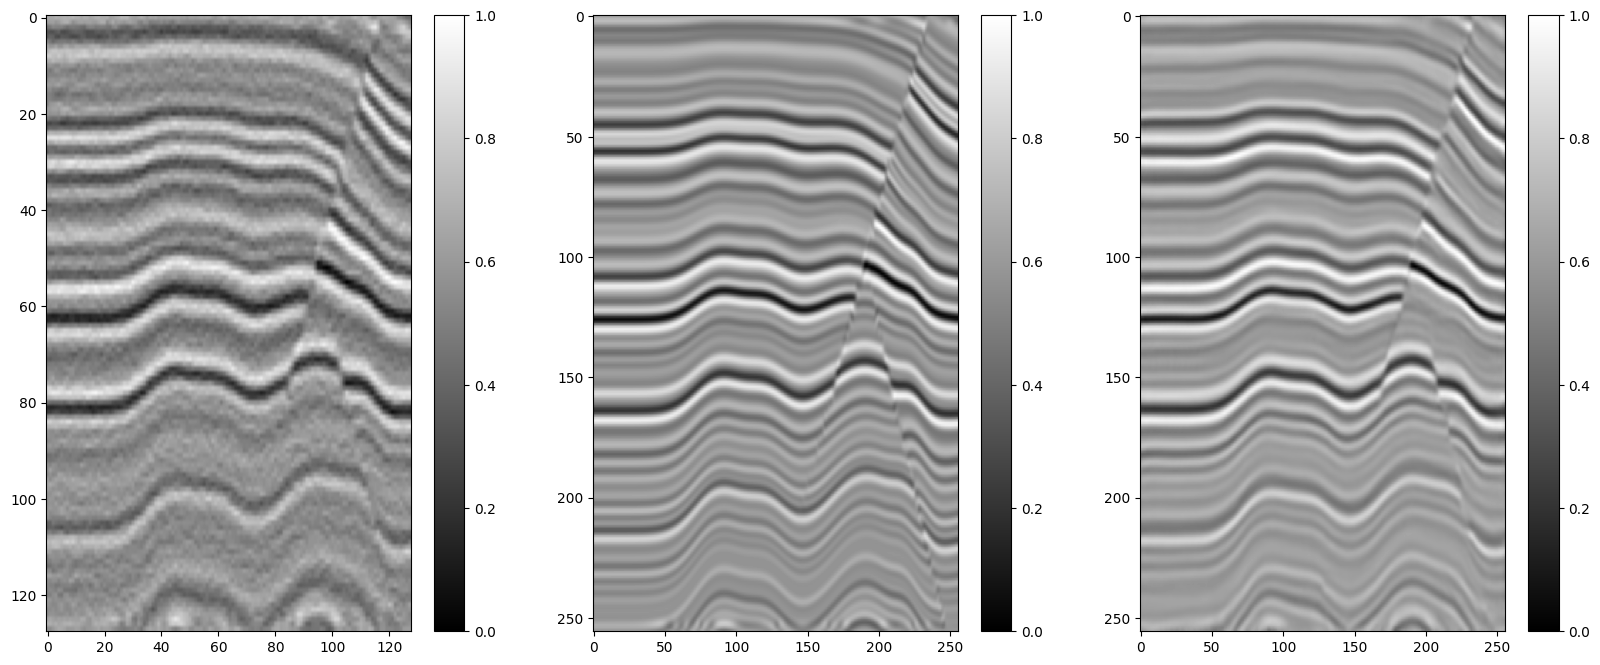

In [12]:
image = testset.reshape(-1,1,128,128)
image = torch.tensor(image, dtype=torch.float).to(device)
output = model(image)
output = output.detach().cpu().numpy()
output = output[:,0,:,:]
output = Normalization(output)

# Plotting the results.
fig = plt.figure(figsize=(20,8))
plt.subplot(1,3,1),plt.imshow(testset[0],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 

plt.subplot(1,3,2),plt.imshow(label_test[0,:,:],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 

plt.subplot(1,3,3),plt.imshow(output[0],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 

In [107]:
output_save = output[0].astype(np.float32).T
output_save.tofile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/ESRT_0035_msessim.dat')

In [14]:
unet = np.fromfile('/home/jbgpl/Downloads/SR_denoising/SeismicSuperResolution/experiment/ESRT_paper/results-syn_paper/0035_256x256.dat',dtype='float32').reshape(256,-1).T
unet = Normalization(unet)

In [110]:
output_MSE = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/ESRT_0035_MSE.dat', dtype='float32').reshape(256,-1).T
output_L1 = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/ESRT_0035_L1.dat', dtype='float32').reshape(256,-1).T
output_L1SSIM = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/ESRT_0035_L1SSIM.dat', dtype='float32').reshape(256,-1).T
output_L1SSIMFFT = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/ESRT_0035_L1ssimFFT.dat', dtype='float32').reshape(256,-1).T
output_MSESSIM = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/ESRT_0035_msessim.dat', dtype='float32').reshape(256,-1).T

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140')])

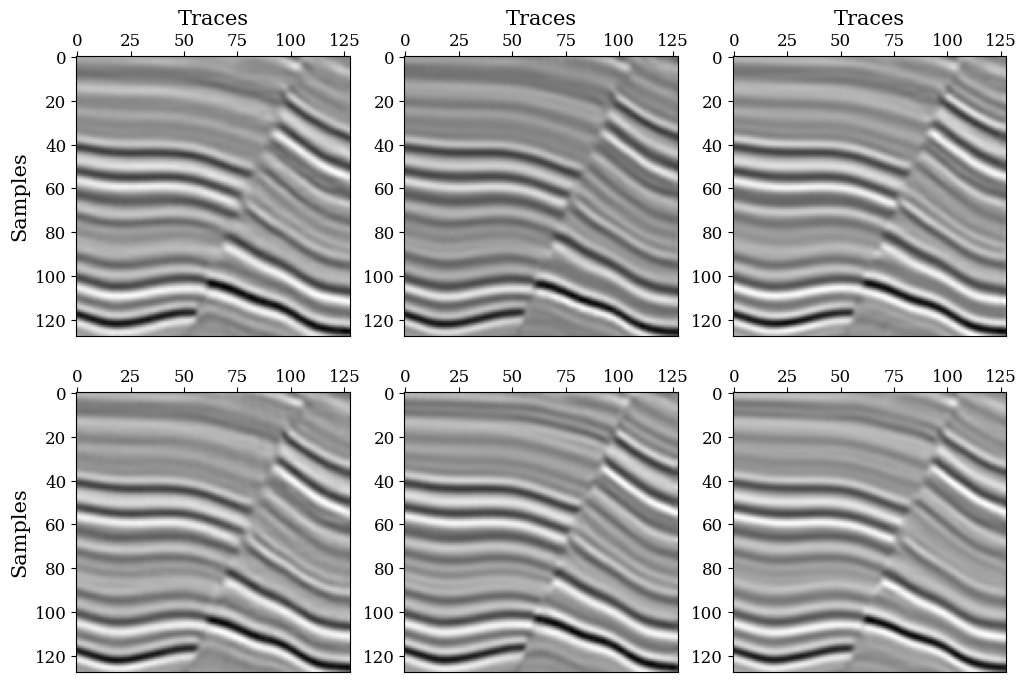

In [119]:
fig = plt.figure(figsize=(12,8))
plt.subplot(2,3,1),plt.imshow(output_L1[:128,128:],aspect='auto',cmap='gray')
# plt.colorbar(label="", orientation="vertical") 
plt.gca().xaxis.set_ticks_position('top')
plt.tick_params(axis='x', which='both', bottom=False, top=True, pad=1)
plt.xticks(fontsize=12)  # x 축의 폰트 크기 조절
plt.yticks(fontsize=12)  # y 축의 폰트 크기 조절

plt.title('Traces', fontsize=15)
plt.ylabel('Samples', fontsize=15)
plt.subplot(2,3,2),plt.imshow(output_L1SSIM[:128,128:],aspect='auto',cmap='gray')  # [544:,160:416]
plt.gca().xaxis.set_ticks_position('top')
plt.tick_params(axis='x', which='both', bottom=False, top=True, pad=1)
# plt.colorbar(label="", orientation="vertical") 
plt.xticks(fontsize=12)  # x 축의 폰트 크기 조절
plt.yticks(fontsize=12)  # y 축의 폰트 크기 조절
plt.title('Traces', fontsize=15)

plt.subplot(2,3,3),plt.imshow(output_L1SSIMFFT[:128,128:],aspect='auto',cmap='gray')
plt.gca().xaxis.set_ticks_position('top')
plt.tick_params(axis='x', which='both', bottom=False, top=True, pad=1)
# plt.colorbar(label="", orientation="vertical") 
plt.xticks(fontsize=12)  # x 축의 폰트 크기 조절
plt.yticks(fontsize=12)  # y 축의 폰트 크기 조절
#plt.title('Traces', fontsize=20)
plt.title('Traces', fontsize=15)


plt.subplot(2,3,4),plt.imshow(output_MSE[:128,128:],aspect='auto',cmap='gray')
plt.gca().xaxis.set_ticks_position('top')
plt.tick_params(axis='x', which='both', bottom=False, top=True, pad=1)
# plt.colorbar(label="", orientation="vertical") 
plt.xticks(fontsize=12)  # x 축의 폰트 크기 조절
plt.yticks(fontsize=12)  # y 축의 폰트 크기 조절
#plt.title('Traces', fontsize=20)
plt.ylabel('Samples', fontsize=15)

plt.subplot(2,3,5),plt.imshow(output_MSESSIM[:128,128:],aspect='auto',cmap='gray')
plt.gca().xaxis.set_ticks_position('top')
plt.tick_params(axis='x', which='both', bottom=False, top=True, pad=1)
# plt.colorbar(label="", orientation="vertical") 
plt.xticks(fontsize=12)  # x 축의 폰트 크기 조절
plt.yticks(fontsize=12)  # y 축의 폰트 크기 조절
#plt.title('Traces', fontsize=20)

plt.subplot(2,3,6),plt.imshow(output[0,:128,128:],aspect='auto',cmap='gray')
plt.gca().xaxis.set_ticks_position('top')
plt.tick_params(axis='x', which='both', bottom=False, top=True, pad=1)
# plt.colorbar(label="", orientation="vertical") 
plt.xticks(fontsize=12)  # x 축의 폰트 크기 조절
plt.yticks(fontsize=12)  # y 축의 폰트 크기 조절
#plt.title('Traces', fontsize=20)

frequency_domain_data_shape :  (128, 128)
frequency_domain_amplitude_shape :  (128, 128) [[1.91596638e+03 2.36653951e+01 3.13684906e+01 ... 3.00223892e+01
  3.13684906e+01 2.36653951e+01]
 [2.31518478e+01 1.92544369e+01 1.69127789e+01 ... 3.97228136e+01
  2.69649413e+01 2.53260095e+01]
 [8.08157346e+00 9.17824437e+00 1.03390232e+01 ... 1.85398849e+01
  1.71603166e+00 4.37734125e+00]
 ...
 [9.34138376e+00 1.00982738e+01 1.33793825e+01 ... 1.00148243e+01
  8.91935821e+00 8.75237818e+00]
 [8.08157346e+00 4.37734125e+00 1.71603166e+00 ... 1.90713875e+01
  1.03390232e+01 9.17824437e+00]
 [2.31518478e+01 2.53260095e+01 2.69649413e+01 ... 1.45350960e+01
  1.69127789e+01 1.92544369e+01]]
frequency_domain_average_amplitude_shape :  (128,) [18.66243426  3.89096833  4.01700431  4.37010678  5.44818818  8.2925824
 10.9297299  12.19950193 19.04854586 17.20598848 20.48011493 26.78470992
 32.93736911 36.90158848 39.99208444 25.87059672 29.11040382 27.26083841
 24.60460615 31.17613477 35.66220076 41.46

/tmp/ipykernel_1290172/89194994.py:23: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,250,50)
/tmp/ipykernel_1290172/89194994.py:25: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0,100,10)


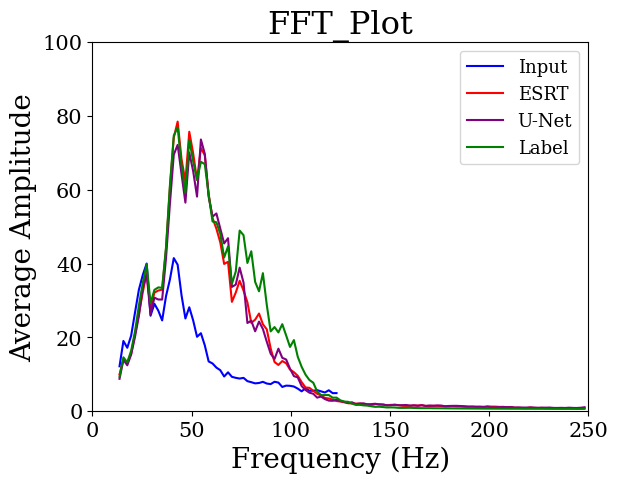

In [15]:
freq_values1, average_amplitude1, input_half1 = FFT(testset[0],sampling_rate=0.004)
freq_values2, average_amplitude2, input_half2 = FFT(output[0],sampling_rate=0.002)
freq_values3, average_amplitude3, input_half3 = FFT(label_test[0,:,:],sampling_rate=0.002)
freq_values4, average_amplitude4, input_half4 = FFT(unet,sampling_rate=0.002)
print(input_half1)
print(input_half2)
print(testset[0].shape)

plt.rcParams["font.family"] = "DejaVu Serif"
# Plot the average amplitude as a function of frequency
plt.plot(freq_values1[7:input_half1], average_amplitude1[7:input_half1], label='Input', color='blue',)
plt.plot(freq_values2[7:input_half2], average_amplitude2[7:input_half2], label='ESRT', color='red')
plt.plot(freq_values4[7:input_half4], average_amplitude4[7:input_half4], label='U-Net', color='purple')
plt.plot(freq_values3[7:input_half3], average_amplitude3[7:input_half3], label='Label', color='green')

# plt.plot(freq_values4[:data_half], average_amplitude4[:data_half], label='Unet_scale', color='yellow')
# plt.plot(freq_values5[:data_half], average_amplitude5[:data_half], label='Unet_zoom', color='purple')
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('Average Amplitude', fontsize=20)
plt.title('FFT_Plot', fontsize=23)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,250,50)
plt.legend(fontsize=13)
plt.ylim(0,100,10)
plt.show()

(1, 128, 128) (1, 256, 256) (1, 256, 256)


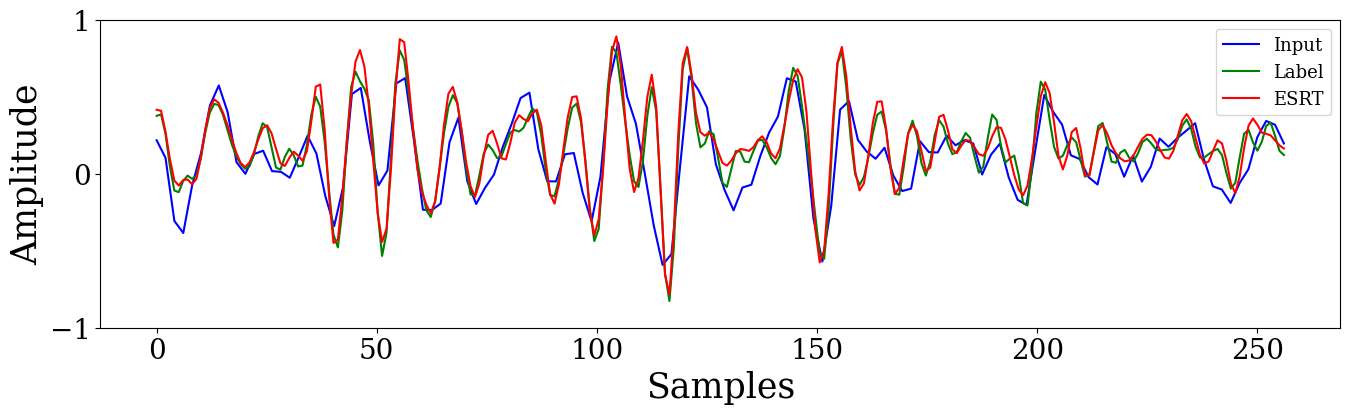

In [140]:
col = 60
col2 = col*2

testset = normalize_to_minus_one_one(testset)
label_test = normalize_to_minus_one_one(label_test)
output = normalize_to_minus_one_one(output)
print(testset.shape, label_test.shape, output.shape)
extended_datin_x = np.linspace(0, (len(testset[0,:,col]))*2, len(testset[0,:,col]))
extended_datin_y = np.linspace(0, (len(label_test[0,:,col2])), len(label_test[0,:,col2]))
extended_datin_z = np.linspace(0, (len(output[0,:,col2])), len(output[0,:,col2]))

fig = plt.figure(figsize=(16,4))
plt.plot(extended_datin_x,testset[0,:,col],label='Input',color='blue')
plt.plot(extended_datin_y,label_test[0,:,col2],label='Label',color='green')
plt.plot(extended_datin_z,output[0,:,col2],label='ESRT',color='red')
plt.legend(fontsize=13)
plt.xlabel('Samples', fontsize=25)
plt.ylabel('Amplitude', fontsize=25)
plt.xticks(fontsize=20)  # x축 눈금 크기 조정
plt.yticks([-1,0,1], fontsize=20)  # y축 눈금 크기 조정
plt.show()




# Testing Phase (Synthetic Data).


In [145]:
import math
from skimage.metrics import structural_similarity as ssim
def compute_psnr(img1, img2):
    img1 = img1.astype(np.float64) 
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return "Same Image"
    return 10 * math.log10(1. / mse)

#compute_psnr(datlab[k,0,:,:],pred), ssim(datlab[k,0,:,:],pred)
compute_psnr(label_test[0,:,:],output[0]), ssim(label_test[0,:,:],output[0])

(27.491066140705133, 0.9098752508893013)

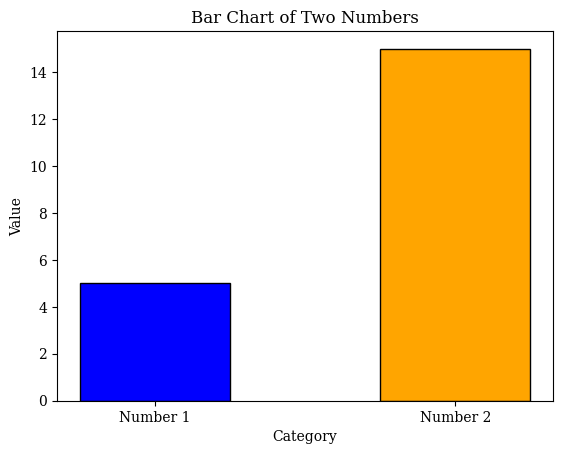

In [63]:
import matplotlib.pyplot as plt

# 두 개의 숫자 데이터
data = [5, 15]
labels = ['Number 1', 'Number 2']

# 막대 그래프 생성
plt.bar(labels, data, width=0.5,color=['blue', 'orange'], edgecolor='black')

# 막대 그래프에 대한 레이블 추가
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Bar Chart of Two Numbers')

# 막대 그래프 표시
plt.show()


In [26]:
output_mse = output[0]

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, -50.0, '−50'),
  Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300')])

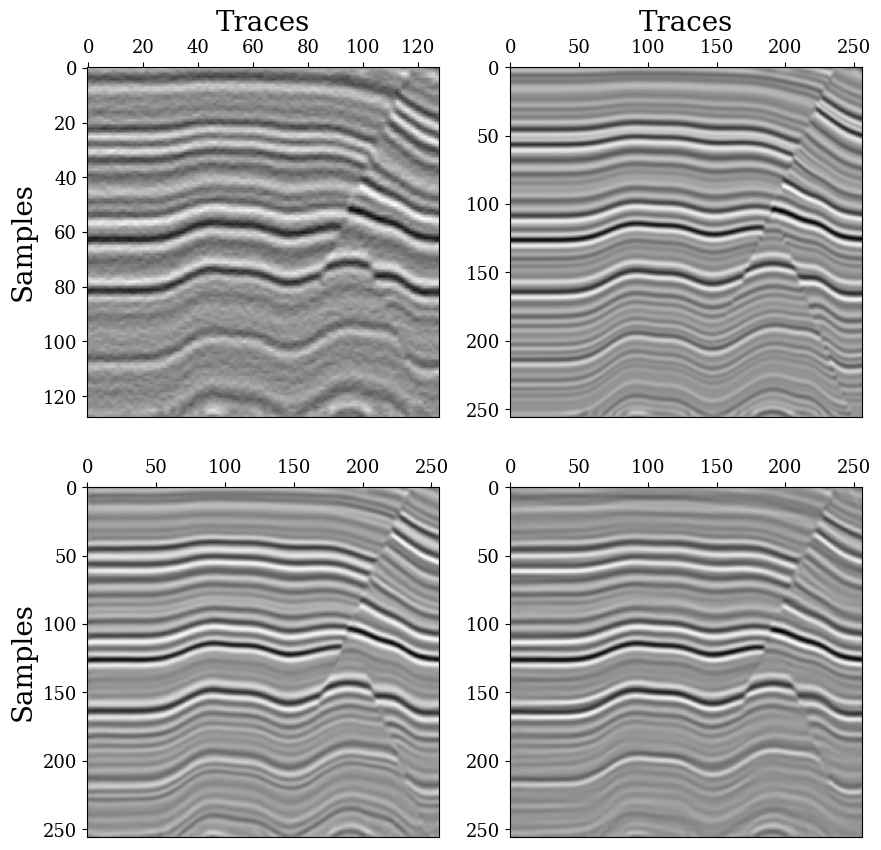

In [138]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1),plt.imshow(testset[0],aspect='auto',cmap='gray')
# plt.colorbar(label="", orientation="vertical").ax.tick_params(labelsize=12)
plt.title('Traces', fontsize=20)
plt.ylabel('Samples', fontsize=20)
plt.gca().xaxis.tick_top()

plt.xticks(fontsize=13)  # x 축의 폰트 크기 조절
plt.yticks(fontsize=13)  # y 축의 폰트 크기 조절

plt.subplot(2,2,2),plt.imshow(label_test[0],aspect='auto',cmap='gray')
# plt.colorbar(label="", orientation="vertical").ax.tick_params(labelsize=12)
plt.title('Traces', fontsize=20)
plt.gca().xaxis.tick_top()
plt.xticks(fontsize=13)  # x 축의 폰트 크기 조절
plt.yticks(fontsize=13)  # y 축의 폰트 크기 조절

plt.subplot(2,2,3),plt.imshow(output[0],aspect='auto',cmap='gray')
# plt.colorbar(label="", orientation="vertical").ax.tick_params(labelsize=12)
plt.gca().xaxis.tick_top()
plt.ylabel('Samples', fontsize=20)
plt.xticks(fontsize=13)  # x 축의 폰트 크기 조절
plt.yticks(fontsize=13)  # y 축의 폰트 크기 조절


plt.subplot(2,2,4),plt.imshow(unet,aspect='auto',cmap='gray')
# plt.colorbar(label="", orientation="vertical").ax.tick_params(labelsize=10)
plt.gca().xaxis.tick_top()
plt.xticks(fontsize=13)  # x 축의 폰트 크기 조절
plt.yticks(fontsize=13)  # y 축의 폰트 크기 조절

Average PSNR, SSIM

In [16]:
palab = glob.glob('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/synthetic_test/image_SRF_2/*')
pain = glob.glob('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/synthetic_test_LR/x2/*')#
print('len = ',len(palab))

datin = []
datlab = []
for k in range(len(palab)):

    sampleNO = palab[k].split('x2')[0].split('/')[-1]
    #print(sampleNO)
    pain = '/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/synthetic_test_LR/x2/' + str(sampleNO)
    datin.append(np.load(pain))
    datlab.append(np.load(palab[k]))





# for k in range(len(palab)):
#     datlab.append(np.transpose(np.load(palab[k]),(2,0,1)))
#     datin.append(np.transpose(np.load(pain[k]),(2,0,1)))

datin = np.array(datin)
datlab = np.array(datlab)

print(datin.shape)
print(palab)

len =  100
(100, 1, 128, 128)
['/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/synthetic_test/image_SRF_2/1859.npy', '/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/synthetic_test/image_SRF_2/1379.npy', '/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/synthetic_test/image_SRF_2/1891.npy', '/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/synthetic_test/image_SRF_2/2435.npy', '/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/synthetic_test/image_SRF_2/2147.npy', '/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/synthetic_test/image_SRF_2/0451.npy', '/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/synthetic_test/image_SRF_2/2307.npy', '/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/synthetic_test/image_SRF_2/2179.npy', '/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/synthetic_test/image_SRF_2/3171.npy', '/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/synthetic_test/image_SRF_2/1923.npy', '/home/jbgpl/Downloads/SR_denoising/ESR

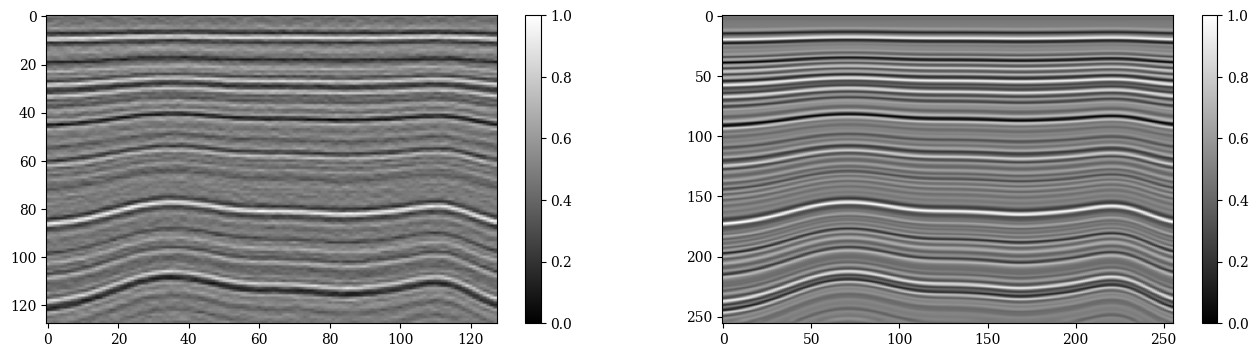

(100, 1, 128, 128)

In [17]:
k = 10

fig = plt.figure(figsize=(16,4))
plt.subplot(1,2,1),plt.imshow(datin[k,0,:,:],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 

plt.subplot(1,2,2),plt.imshow(datlab[k,0,:,:],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 

plt.show() 

np.shape(datin)

In [18]:
import math
from skimage.metrics import structural_similarity as ssim
def compute_psnr(img1, img2):
    img1 = img1.astype(np.float64) 
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return "Same Image"
    return 10 * math.log10(1. / mse)
psnr_li = []
ssim_li = []



n=0
for i in range(len(datin)):

    img = datin[i]
    img = img[np.newaxis,...]
    img = torch.tensor(img, dtype=torch.float).to(device)
    output = model(img)
    output = Normalization(output)
    output = output.detach().cpu().numpy()
    output = output[:,0,:,:]

    psnr1 = compute_psnr(datlab[i,0,:,:],output[0,:,:])
    ssim1 = ssim(datlab[i,0,:,:],output[0,:,:])
    psnr_li.append(psnr1)
    ssim_li.append(ssim1)
    n+=1
print(n)
psnr_avg = sum(psnr_li)/len(psnr_li)
ssim_avg = sum(ssim_li)/len(ssim_li)

print('psnr avg: ',psnr_avg ,'ssim avg: ', ssim_avg)

100
psnr avg:  27.90341836663948 ssim avg:  0.9522882099490353


/tmp/ipykernel_1250047/3187285290.py:15: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(16,34,2)


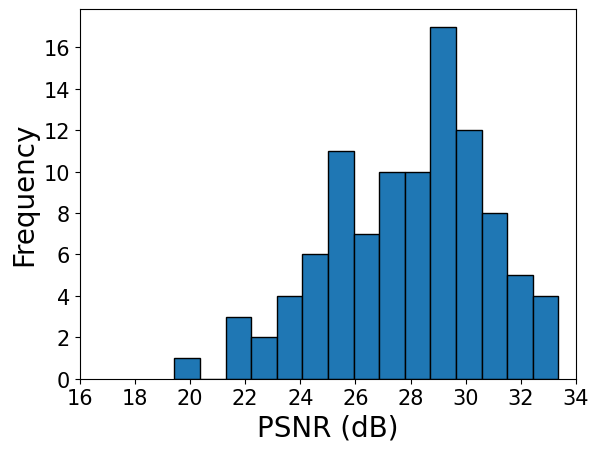

In [25]:
import matplotlib.pyplot as plt

# 두 개의 숫자 데이터
data = [5, 15]

# 히스토그램 생성
plt.hist(psnr_li, bins=15, edgecolor='black')

# 히스토그램에 대한 레이블 추가
plt.xlabel('PSNR (dB)', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)  # x 축의 폰트 크기 조절
plt.yticks(fontsize=15)  # y 축의 폰트 크기 조절
# plt.title('Histogram of Two Numbers')
plt.xlim(16,34,2)
# plt.xlim(0.7,1,0.05)
# 히스토그램 표시
plt.show()

# U-net Synthetic PSNR, SSIM

In [162]:
import glob
palab = glob.glob('/home/jbgpl/Downloads/SR_denoising/SeismicSuperResolution/data/sx_paper_test/*')
pain = glob.glob('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/synthetic_test_LR/x2/*')#
print('len = ',len(palab))

datin = []
datlab = []
for k in range(len(palab)):

    sampleNO = palab[k].split('x2')[0].split('/')[-1]
    #print(sampleNO)
    pain = '/home/jbgpl/Downloads/SR_denoising/SeismicSuperResolution/experiment/ESRT_paper/results-syn/' + str(sampleNO)
    datin.append(Normalization(np.fromfile(pain, dtype='float32').reshape(256,-1,1).T))
    datlab.append(Normalization(np.fromfile(palab[k], dtype='float32').reshape(256,-1,1).T))





# for k in range(len(palab)):
#     datlab.append(np.transpose(np.load(palab[k]),(2,0,1)))
#     datin.append(np.transpose(np.load(pain[k]),(2,0,1)))

datin = np.array(datin)
datlab = np.array(datlab)

print(pain)

len =  100
/home/jbgpl/Downloads/SR_denoising/SeismicSuperResolution/experiment/ESRT_paper/results-syn/3011.dat


In [26]:
import glob

datin = []
datlab = []
for i in range(1,3200,32):


    #print(sampleNO)
    pain = '/home/jbgpl/Downloads/SR_denoising/SeismicSuperResolution/experiment/ESRT_paper/results-syn_paper_val/' +str(int(i)).zfill(4)+'_256x256.dat'
    datin.append(Normalization(np.fromfile(pain, dtype='float32').reshape(256,-1,1).T))
    
for i in range(1,3200,32):


    #print(sampleNO)
    palab = '/home/jbgpl/Downloads/SR_denoising/SeismicSuperResolution/data/sx_paper_val/' +str(int(i)).zfill(4)+'.dat'
    datlab.append(Normalization(np.fromfile(palab, dtype='float32').reshape(256,-1,1).T))






# for k in range(len(palab)):
#     datlab.append(np.transpose(np.load(palab[k]),(2,0,1)))
#     datin.append(np.transpose(np.load(pain[k]),(2,0,1)))

datin = np.array(datin)
datlab = np.array(datlab)

print(datin.shape)
print(datlab.shape)
print(datin.min(), datin.max())

(100, 1, 256, 256)
(100, 1, 256, 256)
0.0 1.0


In [27]:
import math
from skimage.metrics import structural_similarity as ssim
def compute_psnr(img1, img2):
    img1 = img1.astype(np.float64) 
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return "Same Image"
    return 10 * math.log10(1. / mse)
psnr_li = []
ssim_li = []



n=0
for i in range(len(datin)):

    psnr1 = compute_psnr(datlab[i,0,:,:],datin[i,0,:,:])
    ssim1 = ssim(datlab[i,0,:,:],datin[i,0,:,:])
    psnr_li.append(psnr1)
    ssim_li.append(ssim1)
    n+=1
print(n)
psnr_avg = sum(psnr_li)/len(psnr_li)
ssim_avg = sum(ssim_li)/len(ssim_li)

print('psnr avg: ',psnr_avg ,'ssim avg: ', ssim_avg)

100
psnr avg:  26.859759940237822 ssim avg:  0.9335942640985517


/tmp/ipykernel_1250047/3670777085.py:16: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0.7,1,0.05)


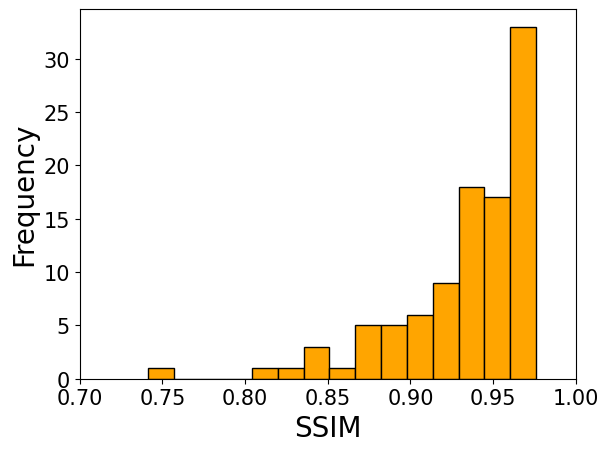

In [29]:
import matplotlib.pyplot as plt

# 두 개의 숫자 데이터
data = [5, 15]

# 히스토그램 생성
plt.hist(ssim_li, bins=15, edgecolor='black',color='orange')

# 히스토그램에 대한 레이블 추가
plt.xlabel('SSIM', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)  # x 축의 폰트 크기 조절
plt.yticks(fontsize=15)  # y 축의 폰트 크기 조절
# plt.title('Histogram of Two Numbers')
# plt.xlim(16,34,2)
plt.xlim(0.7,1,0.05)
# 히스토그램 표시
plt.show()

In [14]:
def min_max_scaling(new, data):
    original_min = np.min(data)
    original_max = np.max(data)
    new_max = np.max(new)
    new_min = np.min(new)
    scaled_data = (data - original_min) / (original_max - original_min) * (new_max - new_min) + new_min
    return scaled_data

In [11]:
checkpoint = '/home/jbgpl/Downloads/SR_denoising/ESRT/experiment_DA_HPB_sch100_nofftL_patch96_noval_x2_novflip_final/checkpoint_x2/epoch_300.pth'
model_dict = load_state_dict(checkpoint)
model.load_state_dict(model_dict, strict=False)#True)
model.eval()

SRCNN(
  (upin): Sequential(
    (0): Upsampler(
      (0): Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): PixelShuffle(upscale_factor=2)
    )
    (1): BasicConv(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (relu): ReLU(inplace=True)
    )
  )
  (encoder1): Updownblock(
    (encoder): one_module(
      (layer1): one_conv(
        (conv): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv1): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu): PReLU(num_parameters=8)
        (weight1): Scale()
        (weight2): Scale()
      )
      (layer2): one_conv(
        (conv): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv1): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu): PReLU(num_parameters=8)
        (weight1): Scale()
        (weight2): Scale()
      )
      (layer4): BasicConv(
       

# Testing Phase (Field Data).

In [17]:
# Loading Filed Data
#FieldTest = np.load('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/field/Volvestack_seis_384_896.npy')[:,200:].T
# FieldTest = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/field/F3_Northsea_651_462.dat',dtype='float32').reshape(651,-1)[:600,50:].T
# FieldTest = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/field/lulia_592x400.dat',dtype='float32').reshape(-1,400).T
# FieldTest = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/field/kumano2_608x400.dat',dtype='float32').reshape(-1,400)[:,50:].T
# FieldTest = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/field/tp_352x240.dat',dtype='float32').reshape(-1,240).T
FieldTest = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/field/sleipPost08p08_560x984.dat',dtype='float32').reshape(-1,984).T
# FieldTest = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/field/F3_Northsea_512_256.dat',dtype='float32').reshape(-1,256)

FieldTest = normalize_to_minus_one_one(FieldTest)
# FieldTest = adjust_filter_intensity(FieldTest, 0.5)

# FieldTest.T.tofile('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/field/ExA_1488_768_5m_laplacian.dat')

FieldTest = FieldTest[np.newaxis,...]
#FieldTest = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/field/F3_Northsea_384_256_cross_depth.dat',dtype='float32').reshape(384,-1,1).T

# FieldUnet = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/field/sleipPost08p08_1120x1968_Unet_scale.bin', dtype='float32').reshape(-1,1968).T
# FieldUnet = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/field/lulia_1184x800_Unet_scale.bin', dtype='float32').reshape(-1,800).T
# FieldUnet = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/field/kumano2_1216_700_Unet_scale_250_patch96.bin', dtype='float32').reshape(-1,700).T
# FieldUnet = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/field/tp_704x480_Unet_scale.bin', dtype='float32').reshape(-1,480).T
# FieldUnet = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/field/tp_704_480_Unet_scale_250_patch96.bin', dtype='float32').reshape(-1,480).T
# FieldUnet = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/field/kumano2_1216x800_ESRT_scale.dat', dtype='float32').reshape(-1,800)[:,100:].T
FieldUnet = np.fromfile('/home/jbgpl/Downloads/SR_denoising/SeismicSuperResolution/experiment/ESRT_paper/results-field_test/tp_704x480.dat', dtype='float32').reshape(-1,480).T
# FieldUnet = normalize_to_minus_one_one(FieldUnet)
#FieldUnet = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/field/ExA_2976_1792_Unet.bin', dtype='float32').reshape(2976,-1).T

# Divide the data into patches and predict the high-resolution image based on the Pre-trained ESRT.
#FieldTest = FieldTest[np.newaxis,...]
device = 'cuda' if torch.cuda.is_available() else 'cpu'



In [18]:

l1 = 96
l2 = 96
o11 = 16
o22 = 16

# Patches

image = yc_patch(FieldTest[0],l1,l2,o11,o22)
print(image.shape)
image = image.reshape(-1,1,l1,l1)

print(image.shape)
outputs = []

# Predict each patc using the ESRT.
for i in range(len(image)):
    img = Normalization(image[i])
    img = img[np.newaxis,...]
    img = torch.tensor(img, dtype=torch.float).to(device)
    output = model(img)
    output = output.detach().cpu().numpy()
    #print('output shape = ',output.shape)
    #output = Normalization(output)
    output = min_max_scaling(image[i],output)
    
    outputs.append(output)

    # Unpatching
outputs = np.array(outputs)
outputs = outputs.reshape(len(outputs),-1)
l1 = l1*2
l2 = l2*2
o1 = o11*2
o2 = o22*2
out = outputs.T
n1,n2 = FieldTest[0].shape
n1 = n1*2
n2 = n2*2
final_output = yc_patch_inv(out,n1,n2,l1,l2,o1,o2) # The reconstructed data.

#final_output = zoom(output, 0.5, order=5)
print(final_output.shape)
# Plotting the results.


(1710, 9216)
(1710, 1, 96, 96)
(1968, 1120)


Text(0.5, 1.0, 'Unet')

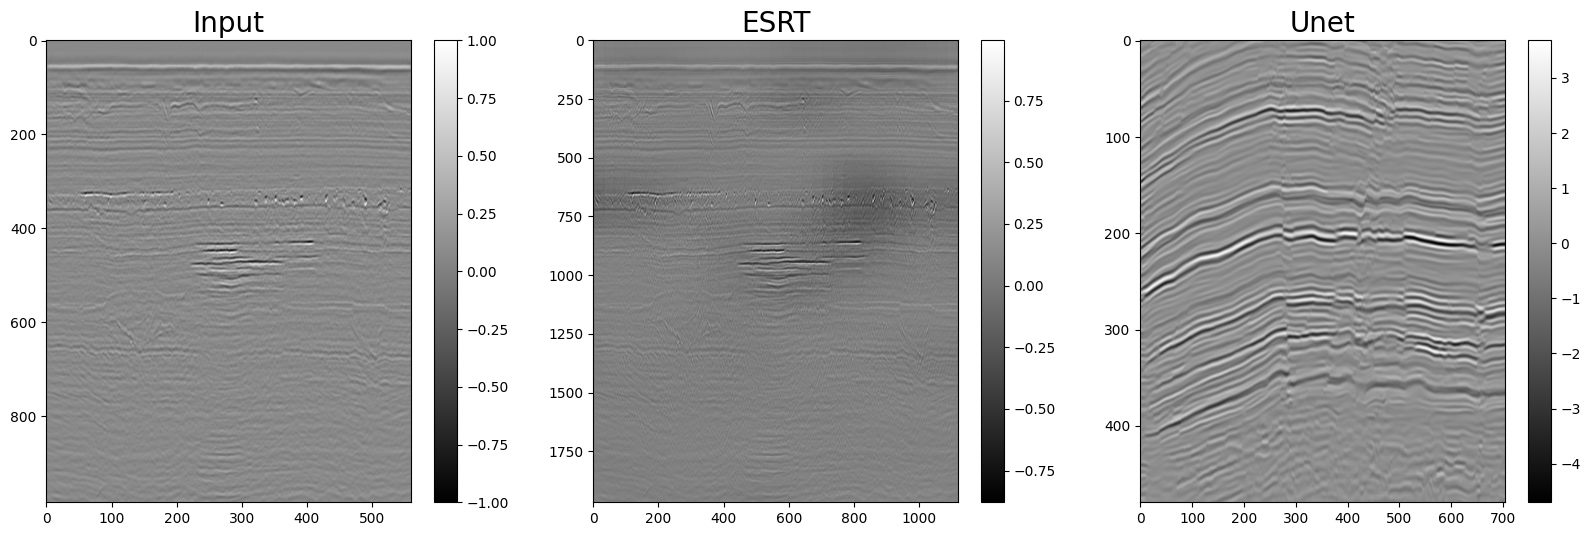

In [19]:
fig = plt.figure(figsize=(20,6))
plt.subplot(1,3,1),plt.imshow(FieldTest[0],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.title('Input', fontsize=20)
plt.subplot(1,3,2),plt.imshow(final_output,aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.title('ESRT', fontsize=20)
plt.subplot(1,3,3),plt.imshow(FieldUnet,aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.title('Unet', fontsize=20)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160')])

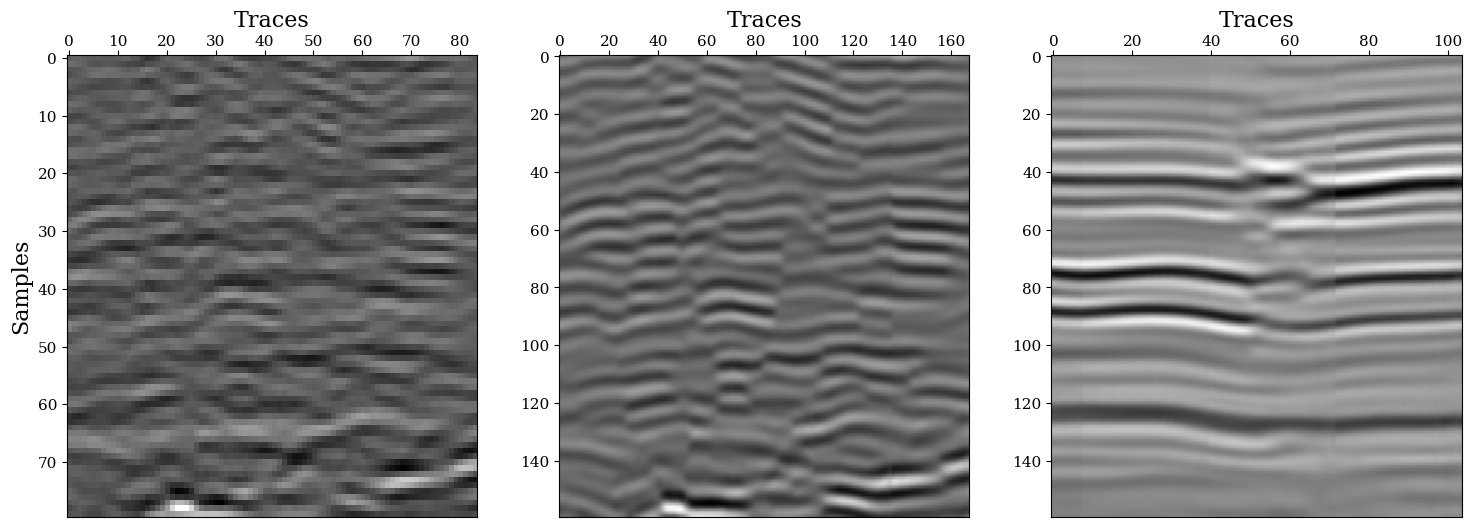

In [181]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1,3,1),plt.imshow(FieldTest[0,120:200,300:],aspect='auto',cmap='gray')
plt.title('Traces', fontsize=16)
plt.ylabel('Samples', fontsize=16)

plt.gca().xaxis.set_ticks_position('top')
plt.tick_params(axis='x', which='both', bottom=False, top=True, pad=1)
plt.xticks(fontsize=11)  # x축 눈금 크기 조정
plt.yticks(fontsize=11)  # y축 눈금 크기 조정

plt.subplot(1,3,2),plt.imshow(final_output[240:400,600:],aspect='auto',cmap='gray')
plt.title('Traces', fontsize=16)
plt.gca().xaxis.set_ticks_position('top')
plt.tick_params(axis='x', which='both', bottom=False, top=True, pad=1)
plt.xticks(fontsize=11)  # x축 눈금 크기 조정
plt.yticks(fontsize=11)  # y축 눈금 크기 조정

plt.subplot(1,3,3),plt.imshow(FieldUnet[240:400,600:],aspect='auto',cmap='gray')
plt.title('Traces', fontsize=16)
plt.gca().xaxis.set_ticks_position('top')
plt.tick_params(axis='x', which='both', bottom=False, top=True, pad=1)
plt.xticks(fontsize=11)  # x축 눈금 크기 조정
plt.yticks(fontsize=11)  # y축 눈금 크기 조정

In [48]:
final_output = normalize_to_minus_one_one(final_output)

Text(0.5, 1.0, 'Unet')

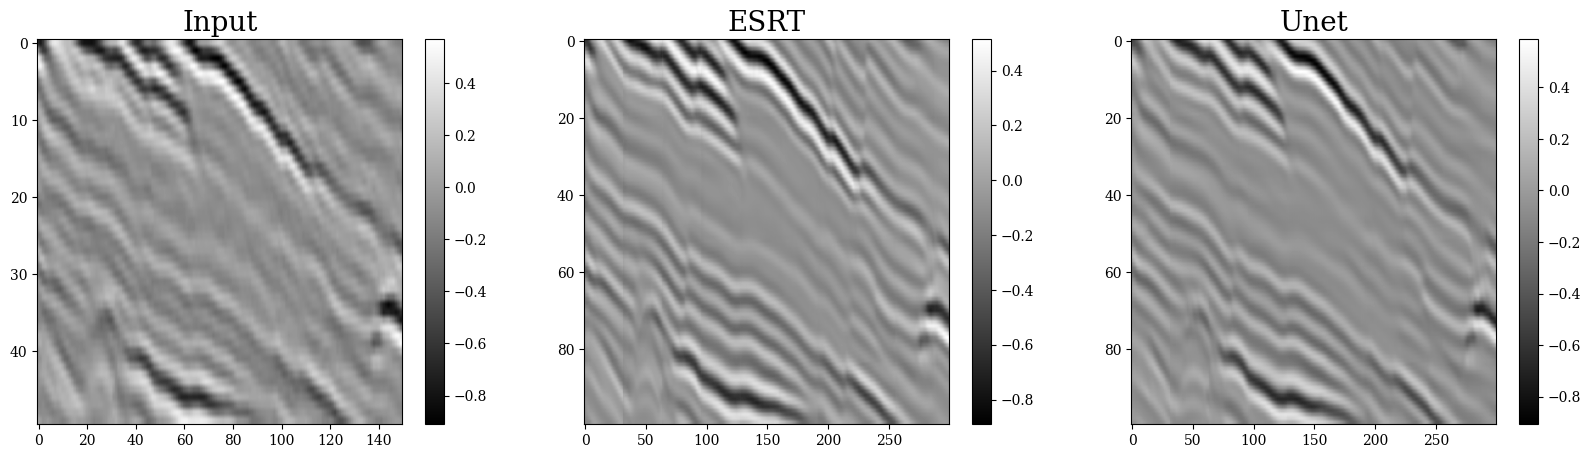

In [49]:
fig = plt.figure(figsize=(20,5))
plt.subplot(1,3,1),plt.imshow(FieldTest[0,150:200,:150],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.title('Input', fontsize=20)
plt.subplot(1,3,2),plt.imshow(final_output[300:400,:300],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.title('ESRT', fontsize=20)
plt.subplot(1,3,3),plt.imshow(FieldUnet[300:400,:300],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.title('Unet', fontsize=20)

In [182]:
final_output_save = final_output.astype(np.float32).T
final_output_save.tofile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/field/Volvestack_seis_768_1392_ESRT_novflip.bin')
FieldTest_save = FieldTest[0].astype(np.float32).T
FieldTest_save.tofile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/field/Volvestack_seis_384_696.bin')


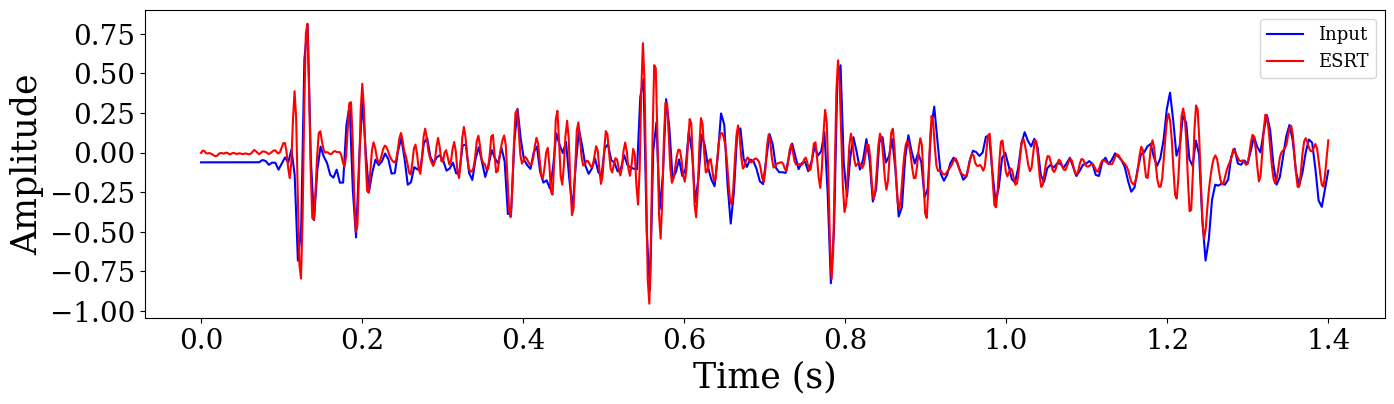

In [86]:

col = 200
col2 = col*2


extended_datin_x = np.linspace(0, (len(FieldTest[0,:,col]))*0.004, len(FieldTest[0,:,col]))
extended_datin_y = np.linspace(0, (len(final_output[:,col2]))*0.002, len(final_output[:,col2]))
extended_datin_z = np.linspace(0, (len(FieldUnet[:,col2]))*0.002, len(FieldUnet[:,col2]))

fig = plt.figure(figsize=(16,4))
plt.plot(extended_datin_x,FieldTest[0,:,col],label='Input', color='blue')
plt.plot(extended_datin_y,final_output[:,col2], label='ESRT', color='red')
plt.legend(fontsize=13)
# plt.plot(extended_datin_z,FieldUnet[:,col2],color='green', label='Input')
plt.xlabel('Time (s)', fontsize=25)
plt.ylabel('Amplitude', fontsize=25)
plt.xticks(fontsize=20)  # x축 눈금 크기 조정
plt.yticks(fontsize=20)  # y축 눈금 크기 조정
plt.show()

frequency_domain_data_shape :  (352, 240)
frequency_domain_amplitude_shape :  (352, 240) [[4.01304108e+03 3.09599229e+00 1.98228908e+00 ... 7.01075454e+00
  1.98228908e+00 3.09599229e+00]
 [6.18450197e+00 1.03863015e+01 1.03501067e+01 ... 6.08335592e+00
  5.41037115e+00 4.37711183e+00]
 [2.06070562e+01 2.01253202e+01 1.96289655e+01 ... 2.33417131e+01
  2.06934208e+01 1.93421682e+01]
 ...
 [1.49870049e+01 1.60405069e+01 1.75921240e+01 ... 1.57458597e+01
  1.66560043e+01 1.65151075e+01]
 [2.06070562e+01 1.93421682e+01 2.06934208e+01 ... 2.07409131e+01
  1.96289655e+01 2.01253202e+01]
 [6.18450197e+00 4.37711183e+00 5.41037115e+00 ... 1.20293575e+01
  1.03501067e+01 1.03863015e+01]]
frequency_domain_average_amplitude_shape :  (240,) [14.09357533  2.75951165  2.84450695  3.04519047  3.35516782  4.20371227
  5.62904116  7.65154789  9.41969532 10.59993403 14.9797578  19.12091877
 35.47307475 36.59353409 30.19567367 30.90598243 26.23499652 40.15329311
 38.69562158 33.50438411 35.19587164 27.8

/tmp/ipykernel_1159694/3264751001.py:20: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,250,50)
/tmp/ipykernel_1159694/3264751001.py:22: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0,200,10)


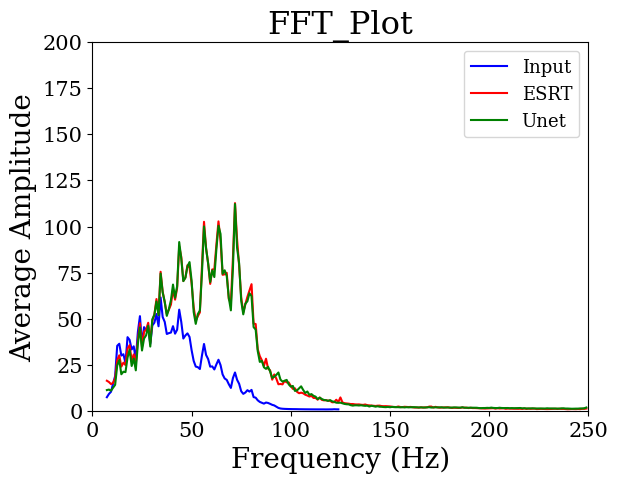

In [174]:
freq_values1, average_amplitude1, input_half1 = FFT(FieldTest[0],sampling_rate=0.004)
freq_values2, average_amplitude2, input_half2 = FFT(final_output,sampling_rate=0.002)
freq_values3, average_amplitude3, input_half3 = FFT(FieldUnet,sampling_rate=0.002)
print(input_half1)
print(input_half2)
print(FieldTest[0].shape)

plt.rcParams["font.family"] = "DejaVu Serif"
# Plot the average amplitude as a function of frequency
plt.plot(freq_values1[7:input_half1], average_amplitude1[7:input_half1], label='Input', color='blue',)
plt.plot(freq_values2[7:input_half2], average_amplitude2[7:input_half2], label='ESRT', color='red')
plt.plot(freq_values3[7:input_half3], average_amplitude3[7:input_half3], label='Unet', color='green')
# plt.plot(freq_values4[:data_half], average_amplitude4[:data_half], label='Unet_scale', color='yellow')
# plt.plot(freq_values5[:data_half], average_amplitude5[:data_half], label='Unet_zoom', color='purple')
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('Average Amplitude', fontsize=20)
plt.title('FFT_Plot', fontsize=23)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,250,50)
plt.legend(fontsize=13)
plt.ylim(0,200,10)
plt.show()

In [59]:
print(final_output.shape)

(800, 1216)


In [59]:
input_lap=final_output.astype(np.float32).T
input_lap.tofile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/field/F3_Northsea_1200_824_ESRT_DA_HPB_scale.dat')

: 

(1166, 16384)
(1166, 1, 128, 128)
(924, 1902)


Text(0.5, 1.0, 'Min-Max scale')

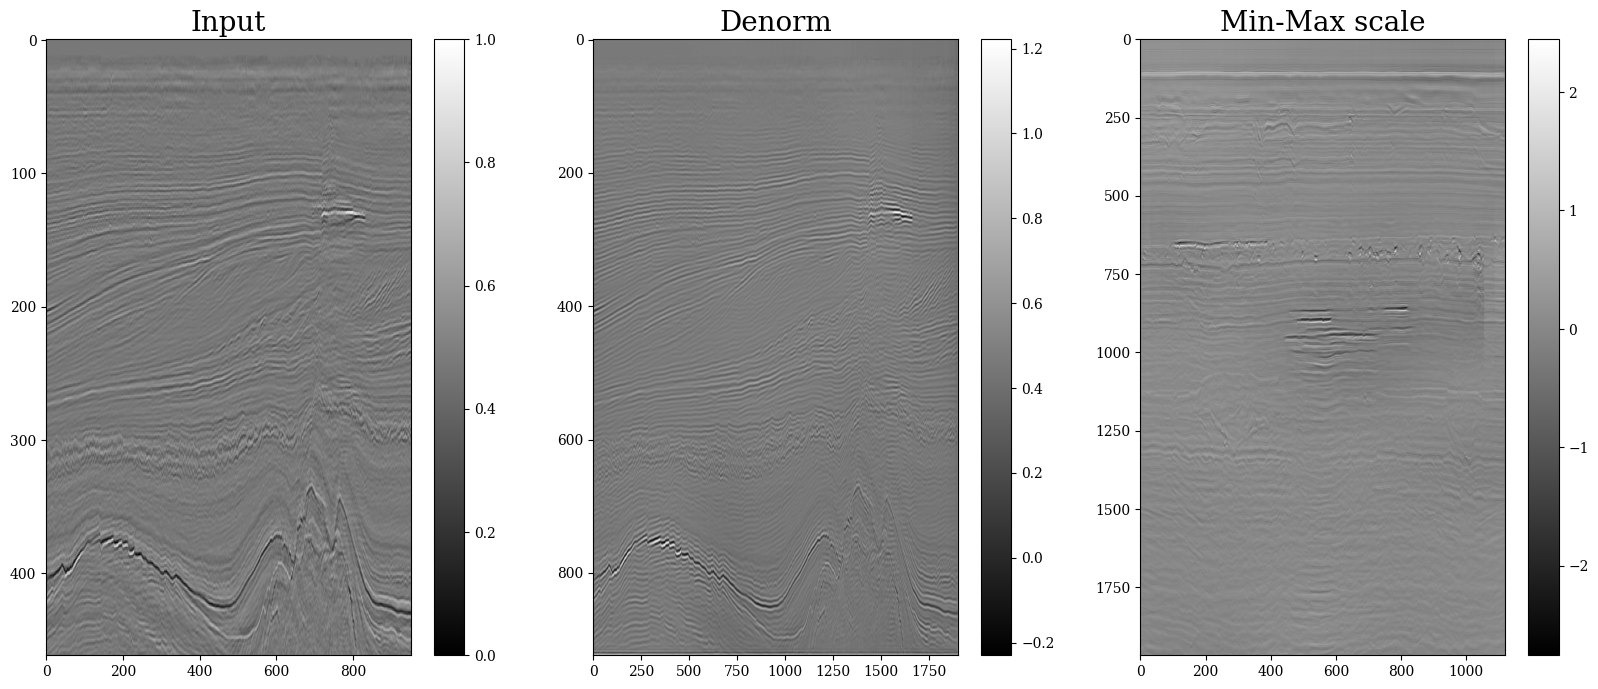

In [33]:
# Loading Filed Data
# FieldTest = np.load('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/field/Volvestack_seis_384_896.npy')[:,200:].T
FieldTest = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/field/F3_Northsea_951_462.dat',dtype='float32').reshape(951,-1).T
#FieldTest = adjust_filter_intensity(FieldTest, 0.5)
FieldTest = Normalization(FieldTest)
# FieldTest.T.tofile('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/field/ExA_1488_768_5m_laplacian.dat')

FieldTest = FieldTest[np.newaxis,...]
#FieldTest = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/field/F3_Northsea_384_256_cross_depth.dat',dtype='float32').reshape(384,-1,1).T


FieldUnet = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/field/sleipPost08p08_1120x1968_ESRT_scale.dat', dtype='float32').reshape(1120,-1).T
#FieldUnet = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/field/ExA_2976_1792_Unet.bin', dtype='float32').reshape(2976,-1).T

# Divide the data into patches and predict the high-resolution image based on the Pre-trained ESRT.
#FieldTest = FieldTest[np.newaxis,...]
device = 'cuda' if torch.cuda.is_available() else 'cpu'
l1 = 128
l2 = 128
o11 = 16
o22 = 16

# Patches

image = yc_patch(FieldTest[0],l1,l2,o11,o22)
print(image.shape)
image = image.reshape(-1,1,128,128)

print(image.shape)
outputs = []

# Predict each patc using the ESRT.
for i in range(len(image)):
    img = Normalization(image[i])
    img = img[np.newaxis,...]
    img = torch.tensor(img, dtype=torch.float).to(device)
    output = model(img)
    output = output.detach().cpu().numpy()
    #print('output shape = ',output.shape)
    #output = Normalization(output)
    output = DeNorm(image[i],output)
    
    outputs.append(output)

    # Unpatching
outputs = np.array(outputs)
outputs = outputs.reshape(len(outputs),-1)
l1 = 256
l2 = 256
o1 = o11*2
o2 = o22*2
out = outputs.T
n1,n2 = FieldTest[0].shape
n1 = n1*2
n2 = n2*2
final_output = yc_patch_inv(out,n1,n2,l1,l2,o1,o2) # The reconstructed data.
#final_output = zoom(output, 0.5, order=5)
print(final_output.shape)
# Plotting the results.
fig = plt.figure(figsize=(20,8))
plt.subplot(1,3,1),plt.imshow(FieldTest[0],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.title('Input', fontsize=20)
plt.subplot(1,3,2),plt.imshow(final_output,aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.title('Denorm', fontsize=20)
plt.subplot(1,3,3),plt.imshow(FieldUnet,aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.title('Min-Max scale', fontsize=20)

Text(0.5, 1.0, 'reduce before unpatching')

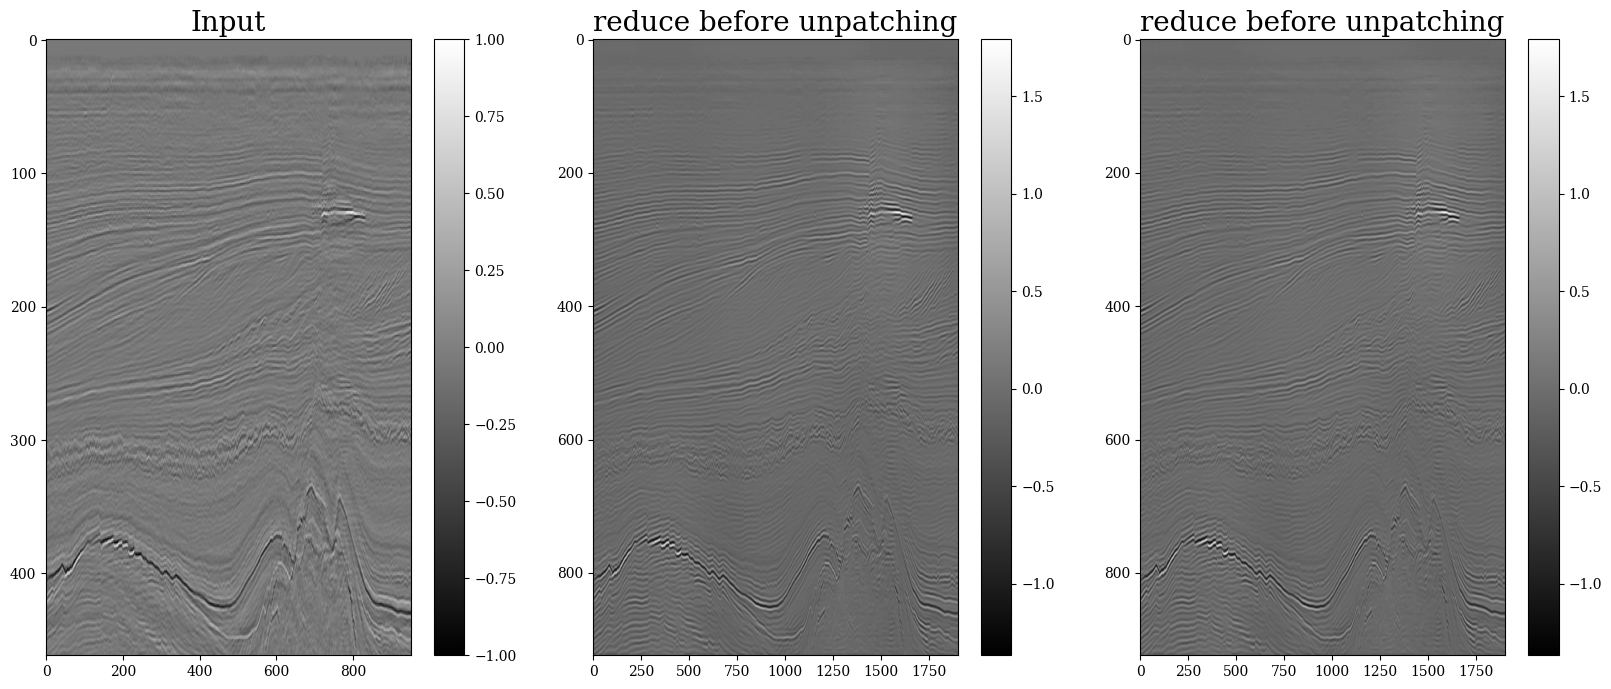

In [143]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1,3,1),plt.imshow(FieldTest[0],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.title('Input', fontsize=20)
plt.subplot(1,3,2),plt.imshow(denorm_final,aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.title('reduce before unpatching', fontsize=20)
plt.subplot(1,3,3),plt.imshow(final_output,aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.title('reduce before unpatching', fontsize=20)

In [109]:
print(final_output.shape)

(924, 1902)


In [129]:

final_output_dat=final_output.astype(np.float32).T
final_output_dat.tofile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/field/F3_Northsea_1902_924_ESRT_nogab_laplacian_denorm.dat')

In [141]:
denorm_final = final_output

seismic_image_data2 (1120, 1968)
seismic_image_data3 (1120, 1968)
seismic_image_data4 (1120, 1968)
seismic_image_data5 (1120, 1968)
984
(1968,) (1968,)
(1968,) (1968,)


/tmp/ipykernel_3901528/1624879062.py:178: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,300,50)
/tmp/ipykernel_3901528/1624879062.py:180: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0,700,50)


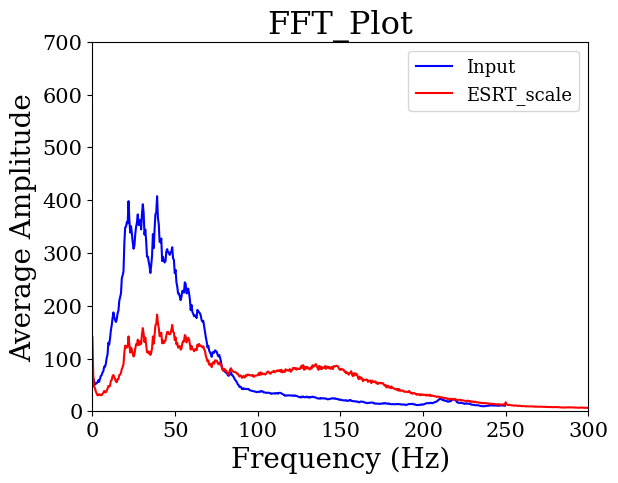

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Sample 2D seismic image data (replace this with your actual image data)
#seismic_image_data = np.fromfile('/home/parkj0e/KAUST/ESRT/Test_Datasets/Unet_synthetic/2886_256x256.dat',dtype='float32').reshape(256,-1)
FieldTest = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/field/sleipPost08p08_560x984.dat',dtype='float32').reshape(560,-1).T
FieldTest = normalize_to_minus_one_one(FieldTest)
FieldTest = adjust_filter_intensity(FieldTest, 0.5)
seismic_image_data = FieldTest.T
# 최대값과 최소값 찾기
max_value = np.max(seismic_image_data)
min_value = np.min(seismic_image_data)
# print(max_value, min_value)
# # 정규화
seismic_image_data = (seismic_image_data - min_value) / (max_value - min_value) * 2 - 1


# Perform 2D Discrete Fourier Transform
frequency_domain_data = np.fft.fft2(seismic_image_data)

# Calculate the amplitude for each frequency
amplitude = np.abs(frequency_domain_data)

# Calculate the average amplitude along the frequency axis (axis=0)
average_amplitude = np.mean(amplitude, axis=0)

# Create x-axis with frequency values
num_cols = seismic_image_data.shape[1]
sampling_rate = 0.002  # You may adjust this depending on your actual data(dt)
freq_values = np.fft.fftfreq(num_cols, d=sampling_rate)

# Sample 2D seismic image data (replace this with your actual image data)
#seismic_image_data2 = np.fromfile('/home/jbgpl/seismic_DL/SR_denoising/SeismicSuperResolution/experiment/alpha6/results-test/sleipPost08p08_1120x1600.dat', dtype='float32').reshape(-1,1600)

seismic_image_data2 = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/field/sleipPost08p08_1120x1968_ESRT_laplacian_scale.dat',dtype='float32').reshape(1120,-1)
seismic_image_data2 = final_output.T
print('seismic_image_data2',seismic_image_data2.shape)

# 최대값과 최소값 찾기
max_value2 = np.max(seismic_image_data2)
min_value2 = np.min(seismic_image_data2)
# # 정규화
seismic_image_data2 = (seismic_image_data2 - min_value2) / (max_value2 - min_value2) * 2 - 1


# Perform 2D Discrete Fourier Transform
frequency_domain_data2 = np.fft.fft2(seismic_image_data2)

# Calculate the amplitude for each frequency
amplitude2 = np.abs(frequency_domain_data2)
#print('amplitude2',amplitude2)

# Calculate the average amplitude along the frequency axis (axis=0)
average_amplitude2 = np.mean(amplitude2, axis=0)

# Create x-axis with frequency values
num_cols2 = seismic_image_data2.shape[1]
sampling_rate2 = 0.001  # You may adjust this depending on your actual data(dt)
freq_values2 = np.fft.fftfreq(num_cols2, d=sampling_rate2)



seismic_image_data3 = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/field/sleipPost08p08_1120x1968_Unet_laplacian_scale.bin',dtype='float32').reshape(1120,-1)
#seismic_image_data3 = zoomed_final.T
print('seismic_image_data3',seismic_image_data3.shape)

w, h = seismic_image_data3.shape
# 최대값과 최소값 찾기
max_value = np.max(seismic_image_data3)
min_value = np.min(seismic_image_data3)
# print(max_value, min_value)
# # 정규화
seismic_image_data3 = (seismic_image_data3 - min_value) / (max_value - min_value) * 2 - 1


# Perform 2D Discrete Fourier Transform
frequency_domain_data3 = np.fft.fft2(seismic_image_data3)

# Calculate the amplitude for each frequency
amplitude3 = np.abs(frequency_domain_data3)
#print('amplitude3',amplitude3)

# Calculate the average amplitude along the frequency axis (axis=0)
average_amplitude3 = np.mean(amplitude3, axis=0)
#print('average_amplitude',average_amplitude3)




# Create x-axis with frequency values
num_cols3 = seismic_image_data3.shape[1]
sampling_rate3 = 0.001  # You may adjust this depending on your actual data(dt)
freq_values3 = np.fft.fftfreq(num_cols3, d=sampling_rate3)

seismic_image_data4 = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/field/sleipPost08p08_1120x1968_ESRT_laplacian_denorm.dat',dtype='float32').reshape(1120,-1)
#seismic_image_data3 = zoomed_final.T
print('seismic_image_data4',seismic_image_data4.shape)

w, h = seismic_image_data4.shape
# 최대값과 최소값 찾기
max_value = np.max(seismic_image_data4)
min_value = np.min(seismic_image_data4)
# print(max_value, min_value)
# # 정규화
seismic_image_data4 = (seismic_image_data4 - min_value) / (max_value - min_value) * 2 - 1


# Perform 2D Discrete Fourier Transform
frequency_domain_data4 = np.fft.fft2(seismic_image_data4)

# Calculate the amplitude for each frequency
amplitude4 = np.abs(frequency_domain_data4)
#print('amplitude3',amplitude3)

# Calculate the average amplitude along the frequency axis (axis=0)
average_amplitude4 = np.mean(amplitude4, axis=0)
#print('average_amplitude',average_amplitude3)




# Create x-axis with frequency values
num_cols4 = seismic_image_data4.shape[1]
sampling_rate4 = 0.001  # You may adjust this depending on your actual data(dt)
freq_values4 = np.fft.fftfreq(num_cols4, d=sampling_rate4)
#print('freq_values3',freq_values3)

seismic_image_data5 = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/field/sleipPost08p08_1120x1968_Unet_laplacian_denorm.bin',dtype='float32').reshape(1120,-1)
#seismic_image_data3 = zoomed_final.T
print('seismic_image_data5',seismic_image_data5.shape)

w, h = seismic_image_data5.shape
# 최대값과 최소값 찾기
max_value = np.max(seismic_image_data5)
min_value = np.min(seismic_image_data5)
# print(max_value, min_value)
# # 정규화
seismic_image_data5 = (seismic_image_data5 - min_value) / (max_value - min_value) * 2 - 1


# Perform 2D Discrete Fourier Transform
frequency_domain_data5 = np.fft.fft2(seismic_image_data5)

# Calculate the amplitude for each frequency
amplitude5 = np.abs(frequency_domain_data5)
#print('amplitude3',amplitude3)

# Calculate the average amplitude along the frequency axis (axis=0)
average_amplitude5 = np.mean(amplitude5, axis=0)
#print('average_amplitude',average_amplitude3)




# Create x-axis with frequency values
num_cols5 = seismic_image_data5.shape[1]
sampling_rate5 = 0.001  # You may adjust this depending on your actual data(dt)
freq_values5 = np.fft.fftfreq(num_cols5, d=sampling_rate5)


data_half = seismic_image_data2.shape[1]//2
input_half = seismic_image_data.shape[1]//2
print(data_half)

print(freq_values3.shape, average_amplitude3.shape)
print(freq_values2.shape, average_amplitude2.shape)
plt.rcParams["font.family"] = "DejaVu Serif"
# Plot the average amplitude as a function of frequency
plt.plot(freq_values[:input_half], average_amplitude[:input_half], label='Input', color='blue',)
plt.plot(freq_values2[:data_half], average_amplitude2[:data_half], label='ESRT_scale', color='red')
# plt.plot(freq_values3[:data_half], average_amplitude3[:data_half], label='Unet_scale', color='green')
# plt.plot(freq_values4[:data_half], average_amplitude4[:data_half], label='ESRT_denorm', color='yellow')
# plt.plot(freq_values5[:data_half], average_amplitude5[:data_half], label='Unet_denorm', color='purple')
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('Average Amplitude', fontsize=20)
plt.title('FFT_Plot', fontsize=23)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,300,50)
plt.legend(fontsize=13)
plt.ylim(0,700,50)
plt.show()

Text(0.5, 1.0, 'Unet_zoomed_output')

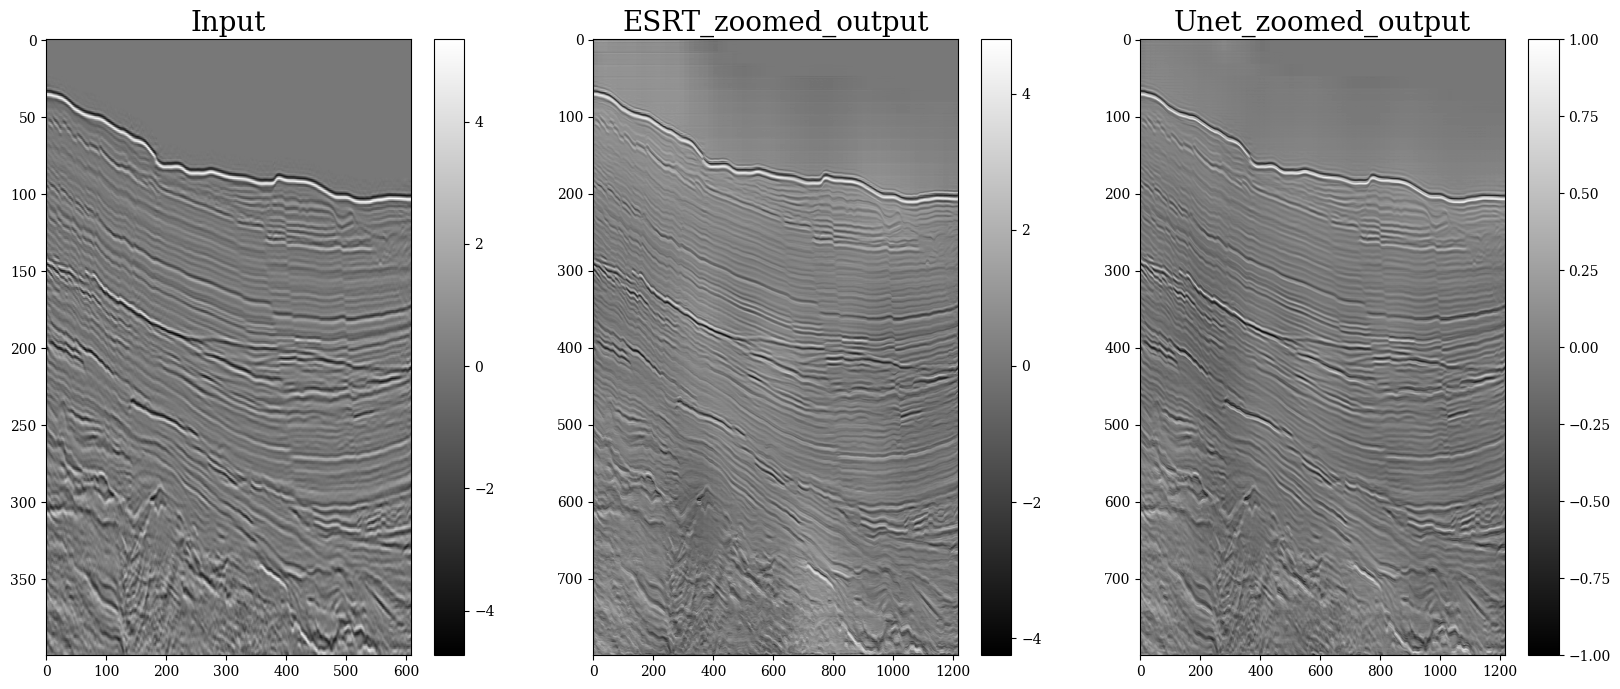

In [220]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1,3,1),plt.imshow(FieldTest[0],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.title('Input', fontsize=20)
plt.subplot(1,3,2),plt.imshow(zoomed_final,aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.title('ESRT_zoomed_output', fontsize=20)
plt.subplot(1,3,3),plt.imshow(seismic_image_data3.T,aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.title('Unet_zoomed_output', fontsize=20)

In [60]:
FieldTest = np.load('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/field/Volvestack_seis_384_896.npy')
FieldTest = FieldTest.astype(np.float32)
FieldTest.tofile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/field/volvestack_384x896.dat')

In [29]:
final_output=final_output.astype(np.float32).T
final_output.tofile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/field/ExA_2976_1792_5m_gabor_ND.bin')

In [ ]:
FieldTest=normalize_to_minus_one_one(FieldTest)
final_output=normalize_to_minus_one_one(final_output)
FieldUnet=normalize_to_minus_one_one(FieldUnet)

# U-net Field Patching

In [87]:
testset = FieldTest = np.load('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/field/Volvestack_seis_384_896.npy').T
print(testset.shape)
#testset = normalize_to_minus_one_one(testset)*10

device = 'cuda' if torch.cuda.is_available() else 'cpu'
l1 = 128
l2 = 128
o11 = 16
o22 = 16
print(testset.min())
# print(testset[0].shape)
# testset_norm = Normalization(testset[0])
image = yc_patch(testset,l1,l2,o11,o22)
print(image.shape)
image = image.reshape(-1,1,128,128)
print(image.shape)

(896, 384)
0.2351453
(833, 16384)
(833, 1, 128, 128)


In [88]:
for i in range(0,len(image)):
    image_patch = image[i].T
    image_patch = normalize_to_minus_one_one(image_patch)*5
    image_patch.tofile('/home/jbgpl/Downloads/SR_denoising/SeismicSuperResolution/data/field_Volvestack_patch/patch'+str(i).zfill(4)+'_128x128.dat')
print(image_patch.dtype)

float32


In [89]:
print(len(image))

833


In [90]:
i=0
aa = np.fromfile('/home/jbgpl/Downloads/SR_denoising/SeismicSuperResolution/experiment/ESRT_paper/results-field_volvestack_patch/patch'+str(i).zfill(4)+'_256x256.dat', dtype='float32').reshape(256,-1,1).T
#aa = normalize_to_minus_one_one(aa)
aa = DeNorm(image[i],aa)
for i in range(1,len(image)):
    unet_SR_patched = np.fromfile('/home/jbgpl/Downloads/SR_denoising/SeismicSuperResolution/experiment/ESRT_paper/results-field_volvestack_patch/patch'+str(i).zfill(4)+'_256x256.dat', dtype='float32').reshape(256,-1,1).T
    #unet_SR_patched = normalize_to_minus_one_one(unet_SR_patched)
    unet_SR_patched = DeNorm(image[i],unet_SR_patched)
    aa = np.concatenate([aa,unet_SR_patched],0)
print(aa.shape)




(833, 256, 256)


In [99]:
print(unet_output.shape)

(1792, 768)


In [103]:
out = aa.reshape(len(image),-1).T
l1 = 256
l2 = 256
o1 = o11*2
o2 = o22*2
    #img = np.concatenate([img,img1],axis=0)



n1,n2 = testset.shape
n1 = n1*2
n2 = n2*2
#print(n1,n2)
unet_output = yc_patch_inv(out,n1,n2,l1,l2,o1,o2)

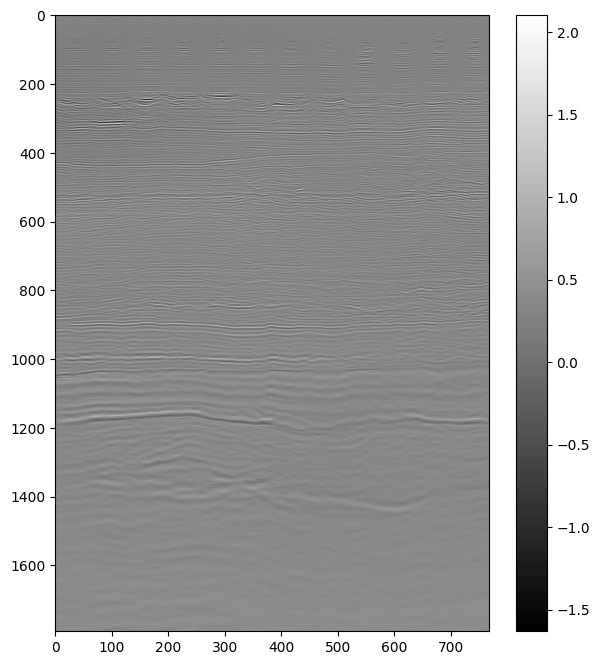

In [104]:
fig = plt.figure(figsize=(7,8))
# plt.subplot(1,3,1),plt.imshow(FieldTest[0],aspect='auto',cmap='gray')
# plt.colorbar(label="", orientation="vertical") 

# plt.subplot(1,3,2),plt.imshow(final_output,aspect='auto',cmap='gray')
# plt.colorbar(label="", orientation="vertical") 

plt.subplot(1,1,1),plt.imshow(unet_output,aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 

In [105]:
unet_output = unet_output.astype('float32').T
#FieldUnet = FieldUnet.astype('float32').T

In [106]:
unet_output.tofile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/field/Volvestack_seis_768_1792_unet.bin')
#FieldUnet.tofile('/home/jbgpl/Downloads/SR_denoising/ESRT/result/field/ExA_2976_1792_Unet_norm.bin')

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(0, -100.0, '−100'),
  Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500')])

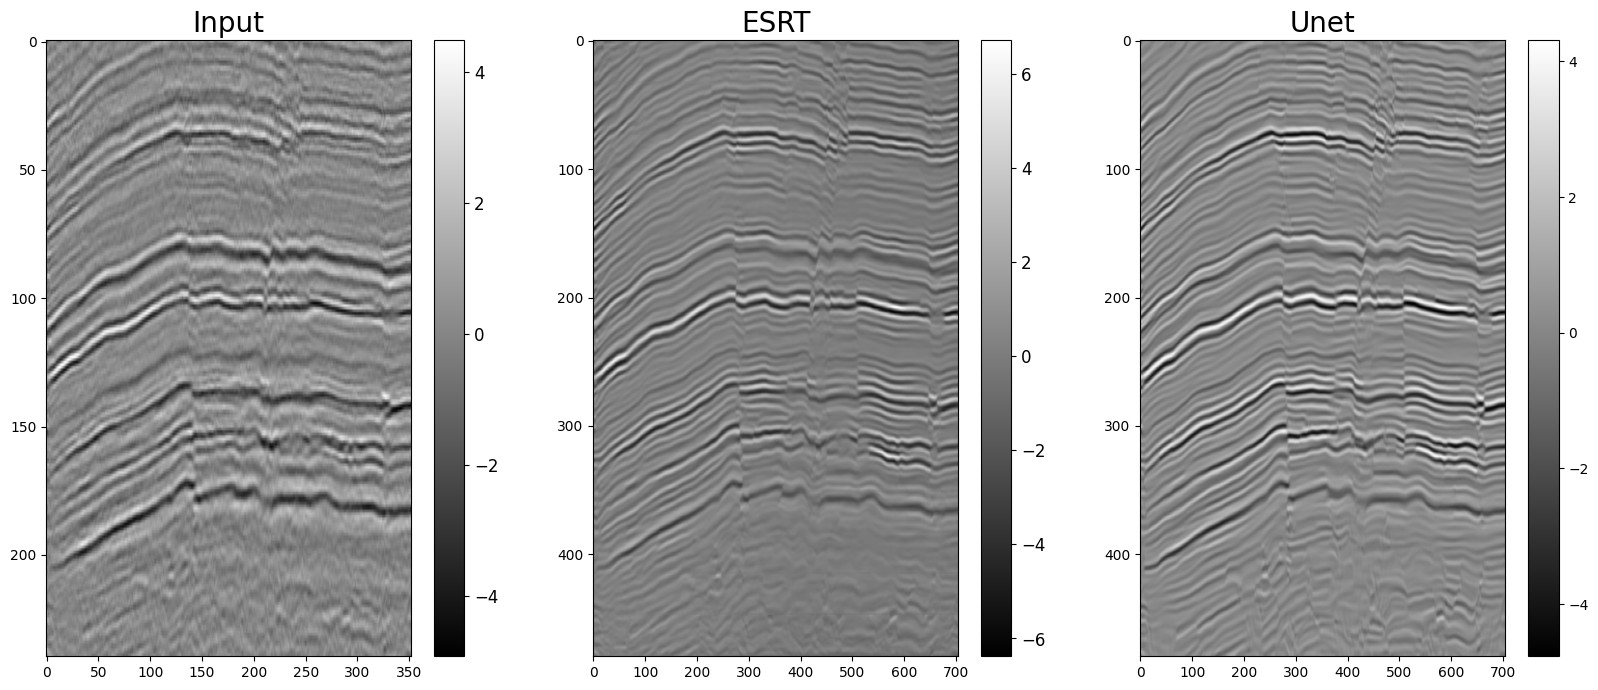

In [17]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1,3,1),plt.imshow(FieldTest[0],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical").ax.tick_params(labelsize=12)
plt.title('Input', fontsize=20)
#plt.xlabel('X Label', fontsize=16)
plt.xticks(fontsize=10)  # x 축의 폰트 크기 조절
plt.yticks(fontsize=10)  # y 축의 폰트 크기 조절

# plt.subplot(1,4,2),plt.imshow(label_test[0,:,:],aspect='auto',cmap='gray')
# plt.colorbar(label="", orientation="vertical").ax.tick_params(labelsize=12)
# plt.title('Label', fontsize=20)
# plt.xticks(fontsize=10)  # x 축의 폰트 크기 조절
# plt.yticks(fontsize=10)  # y 축의 폰트 크기 조절

plt.subplot(1,3,2),plt.imshow(final_output,aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical").ax.tick_params(labelsize=12)
plt.title('ESRT', fontsize=20)
plt.xticks(fontsize=10)  # x 축의 폰트 크기 조절
plt.yticks(fontsize=10)  # y 축의 폰트 크기 조절
plt.subplot(1,3,3),plt.imshow(FieldUnet,aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical").ax.tick_params(labelsize=10)
plt.title('Unet', fontsize=20)
plt.xticks(fontsize=10)  # x 축의 폰트 크기 조절
plt.yticks(fontsize=10)  # y 축의 폰트 크기 조절

In [ ]:
final_output=final_output.astype(np.float32).T
print(final_output.dtype)
final_output.tofile('/home/parkj0e/KAUST/ESRT/results_myself/field/ExA_2976_1792.bin')

float32


freq_values3 [ 0.          0.55803571  1.11607143 ... -1.67410714 -1.11607143
 -0.55803571]
(256,) (256,)
(1792,) (1792,)


/tmp/ipykernel_3193699/1502371544.py:98: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(10,600,50)
/tmp/ipykernel_3193699/1502371544.py:100: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0,100,10)


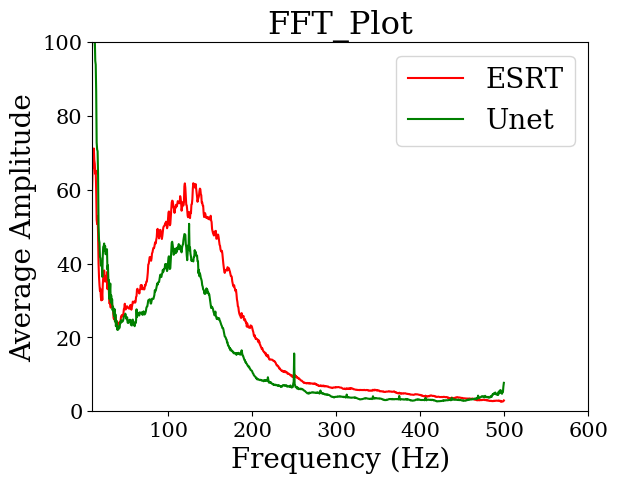

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample 2D seismic image data (replace this with your actual image data)
#seismic_image_data = np.fromfile('/home/parkj0e/KAUST/ESRT/Test_Datasets/Unet_synthetic/2886_256x256.dat',dtype='float32').reshape(256,-1)
seismic_image_data = label_test[0,:,:].T
# 최대값과 최소값 찾기
max_value = np.max(seismic_image_data)
min_value = np.min(seismic_image_data)
# print(max_value, min_value)
# # 정규화
seismic_image_data = (seismic_image_data - min_value) / (max_value - min_value) * 2 - 1


# Perform 2D Discrete Fourier Transform
frequency_domain_data = np.fft.fft2(seismic_image_data)

# Calculate the amplitude for each frequency
amplitude = np.abs(frequency_domain_data)

# Calculate the average amplitude along the frequency axis (axis=0)
average_amplitude = np.mean(amplitude, axis=0)

# Create x-axis with frequency values
num_cols = seismic_image_data.shape[1]
sampling_rate = 0.001  # You may adjust this depending on your actual data(dt)
freq_values = np.fft.fftfreq(num_cols, d=sampling_rate)

# Sample 2D seismic image data (replace this with your actual image data)
#seismic_image_data2 = np.fromfile('/home/jbgpl/seismic_DL/SR_denoising/SeismicSuperResolution/experiment/alpha6/results-test/sleipPost08p08_1120x1600.dat', dtype='float32').reshape(-1,1600)
seismic_image_data2 = final_output.T
# 최대값과 최소값 찾기
max_value2 = np.max(seismic_image_data2)
min_value2 = np.min(seismic_image_data2)
# # 정규화
seismic_image_data2 = (seismic_image_data2 - min_value2) / (max_value2 - min_value2) * 2 - 1


# Perform 2D Discrete Fourier Transform
frequency_domain_data2 = np.fft.fft2(seismic_image_data2)

# Calculate the amplitude for each frequency
amplitude2 = np.abs(frequency_domain_data2)
#print('amplitude2',amplitude2)

# Calculate the average amplitude along the frequency axis (axis=0)
average_amplitude2 = np.mean(amplitude2, axis=0)

# Create x-axis with frequency values
num_cols2 = seismic_image_data2.shape[1]
sampling_rate2 = 0.001  # You may adjust this depending on your actual data(dt)
freq_values2 = np.fft.fftfreq(num_cols2, d=sampling_rate2)


seismic_image_data3 = FieldUnet.T
w, h = seismic_image_data3.shape
# 최대값과 최소값 찾기
max_value = np.max(seismic_image_data3)
min_value = np.min(seismic_image_data3)
# print(max_value, min_value)
# # 정규화
seismic_image_data3 = (seismic_image_data3 - min_value) / (max_value - min_value) * 2 - 1


# Perform 2D Discrete Fourier Transform
frequency_domain_data3 = np.fft.fft2(seismic_image_data3)

# Calculate the amplitude for each frequency
amplitude3 = np.abs(frequency_domain_data3)
#print('amplitude3',amplitude3)

# Calculate the average amplitude along the frequency axis (axis=0)
average_amplitude3 = np.mean(amplitude3, axis=0)
#print('average_amplitude',average_amplitude3)




# Create x-axis with frequency values
num_cols3 = seismic_image_data3.shape[1]
sampling_rate3 = 0.001  # You may adjust this depending on your actual data(dt)
freq_values3 = np.fft.fftfreq(num_cols3, d=sampling_rate3)
print('freq_values3',freq_values3)


print(freq_values.shape, average_amplitude.shape)
print(freq_values2.shape, average_amplitude2.shape)
plt.rcParams["font.family"] = "DejaVu Serif"
# Plot the average amplitude as a function of frequency
#plt.plot(freq_values[:128], average_amplitude[:128], label='Label', color='blue')
plt.plot(freq_values2[:896], average_amplitude2[:896], label='ESRT', color='red')
plt.plot(freq_values3[:896], average_amplitude3[:896], label='Unet', color='green')
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('Average Amplitude', fontsize=20)
plt.title('FFT_Plot', fontsize=23)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(10,600,50)
plt.legend(fontsize=20)
plt.ylim(0,100,10)
plt.show()

In [ ]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

for name, layer in model.named_modules():
    layer.register_forward_hook(get_activation(name))
    #namall.append(name)


device = torch.device('cuda')
model = model.to(device)
#summary(model,(1,128,128))
im_input = np.load('/home/jbgpl/Downloads/SR_denoising/ESRT/dataset/DF2K_decoded/DIV2K_train_LR_bicubic/X2/0002.npy')
im_input = np.transpose(im_input, (2, 1, 0))
im_input = im_input[np.newaxis, ...]
image = torch.from_numpy(im_input).float()# plt.figure()


im_label = np.load('/home/jbgpl/Downloads/SR_denoising/ESRT/dataset/DF2K_decoded/DIV2K_train_HR/0002.npy')
im_label = np.transpose(im_label, (2, 1, 0))
im_label = im_label[np.newaxis, ...]
im_label = torch.from_numpy(im_label).float()# plt.figure()

print('label', im_label.shape)



im_predict = image.to(device)
im_predict = model(im_predict)
#output = Normalization(output)
#print(output.max(),output.min())
im_predict = im_predict.detach().cpu().numpy()
im_predict = torch.from_numpy(im_predict).float()
print('predict', im_predict.shape)



# im_predict = np.load('/home/parkj0e/Downloads/SuperRes/result/mytest/synthetic/x2/0002x2x2.npy')

# im_predict = im_predict[np.newaxis,np.newaxis, ...]
# im_predict = torch.from_numpy(im_predict).float()# plt.figure()



x = image.to(device)

print('activation number',len(activation))
outputall = []
keyall = []
output = model(x)
search_word='conv'
word = 'layer'
no_word = 'du'
filtered_dict = {key: value for key, value in activation.items() if search_word in key}
filtered_dict = {key: value for key, value in filtered_dict.items() if not no_word in key}
#filtered_dict = {key: value for key, value in filtered_dict.items() if word in key}
for key in filtered_dict:
    outputall.append(filtered_dict[key].detach().cpu())
    keyall.append(key)

print('number of key',len(keyall))

# print('all keys',keyall)
# for i in range(len(outputall)):
#     print('output_shape', outputall[i].shape)

keyall.insert(0,'training data')
keyall.append('predicted data')
keyall.append('label data')

outputall.insert(0,image)
outputall.append(im_predict)
outputall.append(im_label)



processed = []
for feature_map in outputall:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
# for fm in processed:
#     print(fm.shape)
print('number of key',len(keyall))
print('number of output',len(outputall))
print(outputall[0].shape)

import matplotlib.pyplot as plt
import numpy
import glob

layernum = 200
featuremapnumber = 0

fig = plt.figure(figsize=(20, 10))
i=0

# for j in range(0,11):  #(20*i,20*(1+i))
#     a = fig.add_subplot(3, 4, j+1)  #(4, 5, j+1-20*i)
#     imgplot = plt.imshow(processed[j],aspect='auto',cmap='gray')
#     plt.colorbar(label="", orientation="vertical") 
#     plt.xticks(fontsize=5)
#     #a.axis("off")
#     a.set_title(keyall[j], fontsize=8) #.split('.')[0]
# plt.savefig(str('feature_maps'+ str(i) + '.jpg'))    
# plt.show()






for j in range(20*i,20*(1+i)):
    print(j)
    a = fig.add_subplot(4, 5, j+1-20*i)
    imgplot = plt.imshow(outputall[j][0,featuremapnumber,:,:],aspect='auto',cmap='gray')
    plt.colorbar(label="", orientation="vertical") 
    plt.xticks(fontsize=5)
    #a.axis("off")
    a.set_title(keyall[j], fontsize=8) #.split('.')[0]
plt.savefig(str('feature_maps'+ str(i) + '.jpg'))    
plt.show()

In [9]:
kk = []
def yaksu(N,K):
    for i in range(N):
        if N%(i+1)==0:
            kk.append(i+1)
    if len(kk)<K:
        print(0)
    else:
        print(kk[K-1])
yaksu(10,2)

2


In [10]:
import argparse, os
%tb

parser = argparse.ArgumentParser(description="Patch")
parser.add_argument("--verbosity", type=int, default=2)
parser.add_argument("--input_width", type=int, default=128)
parser.add_argument("--input_height", type=int, default=128)
parser.add_argument("--overlap", type=int, default=16)
parser.add_argument("--scale_fact", type=int, default=2)
args = parser.parse_args()

def predict(args):
    """
    Super-resolution on the input image using the model.

    :param args:
    :return:
        'predictions' contains an array of every single cropped sub-image once enhanced (the outputs of the model).
        'image' is the original image, untouched.
        'crops' is the array of every single cropped sub-image that will be used as input to the model.
    """
    model = model

    image = np.fromfile('/home/jbgpl/Downloads/SR_denoising/SeismicSuperResolution/data/test/tp_352x240.dat',dtype='float32').reshape(1,352,-1).T # removing possible extra channels (Alpha)
    image = Normalization(image)
    print("Image shape:", image.shape)

    predictions = []
    images = []

    # Padding and cropping the image
    overlap_pad = (overlap, overlap)  # padding tuple
    pad_width = (overlap_pad, overlap_pad, (0, 0))  # assumes color channel as last
    padded_image = np.pad(image, pad_width, 'constant')  # padding the border
    crops = seq_crop(padded_image)  # crops into multiple sub-parts the image based on 'input_' constants

    # Arranging the divided image into a single-dimension array of sub-images
    for i in range(len(crops)):         # amount of vertical crops
        for j in range(len(crops[0])):  # amount of horizontal crops
            current_image = crops[i][j]
            images.append(current_image)

    print("Moving on to predictions. Amount:", len(images))
    upscaled_overlap = overlap * 2
    for p in range(len(images)):
        if p % 3 == 0 and verbosity == 2:
            print("--prediction #", p)

        # Hack due to some GPUs that can only handle one image at a time
        input_img = (np.expand_dims(images[p], 0))  # Add the image to a batch where it's the only member
        pred = model.predict(input_img)[0]          # returns a list of lists, one for each image in the batch

        # Cropping the useless parts of the overlapped predictions (to prevent the repeated erroneous edge-prediction)
        pred = pred[upscaled_overlap:pred.shape[0]-upscaled_overlap, upscaled_overlap:pred.shape[1]-upscaled_overlap]

        predictions.append(pred)
    return predictions, image, crops


def show_pred_output(input, pred):
    plt.figure(figsize=(20, 20))
    plt.suptitle("Results")

    plt.subplot(1, 2, 1)
    plt.title("Input : " + str(input.shape[1]) + "x" + str(input.shape[0]))
    plt.imshow(input, cmap=plt.cm.binary).axes.get_xaxis().set_visible(False)

    plt.subplot(1, 2, 2)
    plt.title("Output : " + str(pred.shape[1]) + "x" + str(pred.shape[0]))
    plt.imshow(pred, cmap=plt.cm.binary).axes.get_xaxis().set_visible(False)

    plt.show()


# adapted from  https://stackoverflow.com/a/52463034/9768291
def seq_crop(img):
    """
    To crop the whole image in a list of sub-images of the same size.
    Size comes from "input_" variables in the 'constants' (Evaluation).
    Padding with 0 the Bottom and Right image.

    :param img: input image
    :return: list of sub-images with defined size (as per 'constants')
    """
    sub_images = []  # will contain all the cropped sub-parts of the image
    j, shifted_height = 0, 0
    while shifted_height < (img.shape[0] - input_height):
        horizontal = []
        shifted_height = j * (input_height - overlap)
        i, shifted_width = 0, 0
        while shifted_width < (img.shape[1] - input_width):
            shifted_width = i * (input_width - overlap)
            horizontal.append(crop_precise(img,
                                           shifted_width,
                                           shifted_height,
                                           input_width,
                                           input_height))
            i += 1
        sub_images.append(horizontal)
        j += 1

    return sub_images


def crop_precise(img, coord_x, coord_y, width_length, height_length):
    """
    To crop a precise portion of an image.
    When trying to crop outside of the boundaries, the input to padded with zeros.

    :param img: image to crop
    :param coord_x: width coordinate (top left point)
    :param coord_y: height coordinate (top left point)
    :param width_length: width of the cropped portion starting from coord_x (toward right)
    :param height_length: height of the cropped portion starting from coord_y (toward bottom)
    :return: the cropped part of the image
    """
    tmp_img = img[coord_y:coord_y + height_length, coord_x:coord_x + width_length]
    return Normalization(tmp_img)  # From [0,255] to [0.,1.]


# adapted from  https://stackoverflow.com/a/52733370/9768291
def reconstruct(predictions, crops):
    """
    Used to reconstruct a whole image from an array of mini-predictions.
    The image had to be split in sub-images because the GPU's memory
    couldn't handle the prediction on a whole image.

    :param predictions: an array of upsampled images, from left to right, top to bottom.
    :param crops: 2D array of the cropped images
    :return: the reconstructed image as a whole
    """

    # unflatten predictions
    def nest(data, template):
        data = iter(data)
        return [[next(data) for _ in row] for row in template]

    if len(crops) != 0:
        predictions = nest(predictions, crops)

    # At this point "predictions" is a 3D image of the individual outputs
    H = np.cumsum([x[0].shape[0] for x in predictions])
    W = np.cumsum([x.shape[1] for x in predictions[0]])
    D = predictions[0][0]
    recon = np.empty((H[-1], W[-1], D.shape[2]), D.dtype)
    for rd, rs in zip(np.split(recon, H[:-1], 0), predictions):
        for d, s in zip(np.split(rd, W[:-1], 1), rs):
            d[...] = s

    # Removing the pad from the reconstruction
    tmp_overlap = overlap * (scale_fact - 1)  # using "-2" leaves the outer edge-prediction error
    return recon[tmp_overlap:recon.shape[0]-tmp_overlap, tmp_overlap:recon.shape[1]-tmp_overlap]

preds, original, crops = predict(args)  # returns the predictions along with the original
enhanced = reconstruct(preds, crops)    # reconstructs the enhanced image from predictions

    # Save and display the result
show_pred_output(original, enhanced)

2


1
